<a href="https://colab.research.google.com/github/Immanuel-01/Sentiment-Analysis-Of-Dell-Review/blob/main/100757701_Natural_Language_Processing_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis of Dell Tweets**


Social media is a crucial medium for customer engagement and feedback in today's digital environment. Businesses such as Dell can use this information to improve their products, services, and general satisfaction with customers. By using natural language processing (NLP) to analyse tweets, businesses can gain useful insights into the sentiments of their customers and improve their customer service tactics.

The goal of this research is to analyse tweets about Dell products by categorising them as positive, negative, or neutral sentiments and identifying the emotions that underlie these sentiments (such as happiness, excitement, or rage). This study offers a thorough overview of the sentiment landscape and model-driven insights for real-world applications by combining conventional and deep learning natural language processing procedures.























# Objectives

*   **Data Exploration** : Exploratory data analysis ( EDA ) will be performed to uncover trends and patterns in sentiments and emotions
*   **Data Preparation** : Preprocessing of textual data for an effective extraction of features and input into machine/deep learning models
*   **Model Training** : Predictive model training using :
1. Frequnecy-based methods like TF-IDF,
2. Probability-based methods like Word2Vec.
3. Traditional machine learning approaches ( SVM, Logistic Regression, Naive Bayes, Random Forest ).
4. Deep learning methods ( RNN, LSTM, BERT )
*   **Model Evaluation** : Model performance evaluation using metrics such as accuracy, precision, and F1 score.
*   **Recommendations** : Provision of actionable insights based on findings for potential deployment and application in systems for analysis sentiments







## Installation of neccessary initial libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
import re
import seaborn as sns
import matplotlib.pyplot as plt

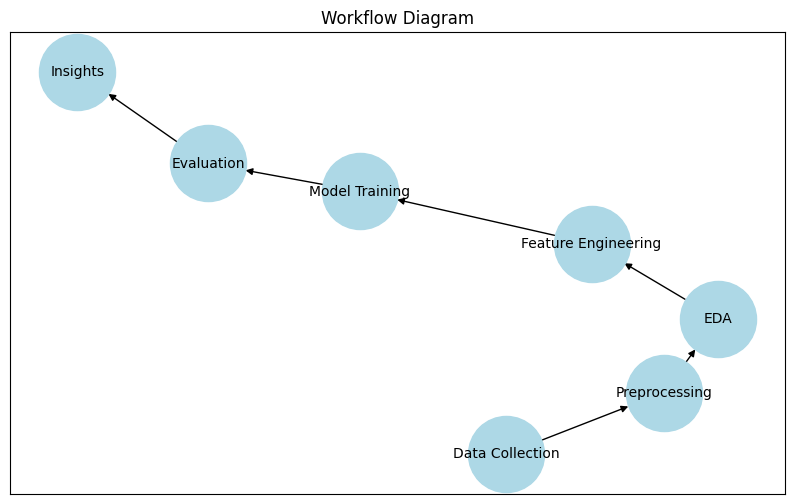

In [ ]:
import networkx as nx

# I created a directed graph
G = nx.DiGraph()

# To add nodes and edges
G.add_edges_from([
    ("Data Collection", "Preprocessing"),
    ("Preprocessing", "EDA"),
    ("EDA", "Feature Engineering"),
    ("Feature Engineering", "Model Training"),
    ("Model Training", "Evaluation"),
    ("Evaluation", "Insights")
])

# To draw the graph
plt.figure(figsize=(10, 6))
nx.draw_networkx(
    G,
    pos=nx.spring_layout(G),
    with_labels=True,
    node_size=3000,
    node_color="lightblue",
    font_size=10
)
plt.title("Workflow Diagram")
plt.show()


## Data Understanding And Cleaning

In [ ]:
# Load the dataset into the pandas dataframe
my_work = pd.read_csv("sentiment-emotion-labelled_Dell_tweets.csv")

my_work.dropna(inplace=True)  # Handles missing values in rows of the dataset.

# Cleaning the text data
def cleaned_text(text):
    text = re.sub(r"http[s]?://\S+", "<URL>", text) # Replaces URLs with the placeholder <URL>
    text = re.sub(r"\d+", "<NUM>", text) # Replaces numbers with <NUM>
    text = re.sub(r"@\w+", "", text) # Replaces mentions ( e.g "@username" )
    text = re.sub(r"[^\w\s<>]+", "", text)  # Strips out any non-word characters ( except spaces and angle brackets )
    return text.lower() # Converts the texts to lowercases

# Application of the preprocessing to the 'Text' column of the dataset and storing into a new colum "Cleaned_Text"
my_work['Cleaned_Text'] = my_work['Text'].apply(cleaned_text)

# Display a few rows of the cleaned examples
print(my_work[['Text', 'Cleaned_Text']].head())

# Map sentiment values to numerical values
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
my_work['Sentiment_Label'] = my_work['sentiment'].map(sentiment_mapping)

                                                Text  \
0  @Logitech @apple @Google @Microsoft @Dell @Len...   
1  @MK_habit_addict @official_stier @MortalKombat...   
2  As @CRN celebrates its 40th anniversary, Bob F...   
3  @dell your customer service is horrible especi...   
4  @zacokalo @Dell @DellCares @Dell give the man ...   

                                        Cleaned_Text  
0        whatif qwerty were modified for programm...  
1      shes getting a new  laptop when the one sh...  
2  as  celebrates its <num>th anniversary bob fal...  
3   your customer service is horrible especially ...  
4                      give the man what he paid for  


In [ ]:
print(my_work.info())  # I used this to get a summary of my dataframe and to see the column data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24970 entries, 0 to 24969
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       24970 non-null  int64  
 1   Datetime         24970 non-null  object 
 2   Tweet Id         24970 non-null  int64  
 3   Text             24970 non-null  object 
 4   Username         24970 non-null  object 
 5   sentiment        24970 non-null  object 
 6   sentiment_score  24970 non-null  float64
 7   emotion          24970 non-null  object 
 8   emotion_score    24970 non-null  float64
 9   Cleaned_Text     24970 non-null  object 
 10  Sentiment_Label  24970 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 2.1+ MB
None


In [ ]:
print(my_work.describe())    # This shows the summary statistics of the numerical columns in  the dataframe

         Unnamed: 0      Tweet Id  sentiment_score  emotion_score  \
count  24970.000000  2.497000e+04     24970.000000   24970.000000   
mean   12484.500000  1.526448e+18         0.782578       0.819114   
std     7208.362447  2.765398e+16         0.150751       0.195378   
min        0.000000  1.477082e+18         0.337307       0.125480   
25%     6242.250000  1.503808e+18         0.664537       0.722941   
50%    12484.500000  1.524811e+18         0.817950       0.906610   
75%    18726.750000  1.550124e+18         0.912815       0.970360   
max    24969.000000  1.575991e+18         0.991532       0.994312   

       Sentiment_Label  
count     24970.000000  
mean         -0.127753  
std           0.837525  
min          -1.000000  
25%          -1.000000  
50%           0.000000  
75%           1.000000  
max           1.000000  


In [ ]:
my_work.shape  # Listed all the column names in the dataframe.

(24970, 11)

In [ ]:
print(my_work.isnull().sum())   # I identified missing rowsor NaN values in the dataframe

Unnamed: 0         0
Datetime           0
Tweet Id           0
Text               0
Username           0
sentiment          0
sentiment_score    0
emotion            0
emotion_score      0
Cleaned_Text       0
Sentiment_Label    0
dtype: int64


In [ ]:
my_work.duplicated().sum()   # To identify the duplicate rows in the dataframe

0

In [ ]:
print(my_work['sentiment'].unique())  # To return the unique values in the column

['neutral' 'positive' 'negative']


# **Exploratory Data Analysis ( EDA )**

1. **Sentiment and Emotion Distribution**: For an understanding of the dataset's category balance, use count plots to visualise the frequency of various sentiment and emotion labels.

2. **Time-Based Sentiment Trends** : Plot sentiment frequencies on a time series to see patterns or shifts and examine how sentiment trends evolve over time

3. **Word Cloud** : To see the most common words connected to each sentiment (**positive, neutral, or negative**), create word clouds for each sentiment category.

4.  **Text Length Analysis** : To determine whether sentiment influences tweet length, use boxplots to examine the distribution of tweet lengths (number of characters) by sentiment.

5. **Emotion Score Analysis** : To find possible discrepancies, use a boxplot to analyse the relationship between sentiment and emotion scores.



In [ ]:
# Check the count of each sentiment category
sentiment_counts = my_work['sentiment'].value_counts()

# Display the counts
print("Sentiment Counts:")
print(sentiment_counts)


Sentiment Counts:
sentiment
negative    10556
positive     7366
neutral      7048
Name: count, dtype: int64


<ipython-input-11-5e73d0307f19>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=my_work, palette='Set2')  # Created a countplot to visualize the distribution of sentiment labels ( positive, neutral, and negative ) in the dataset.


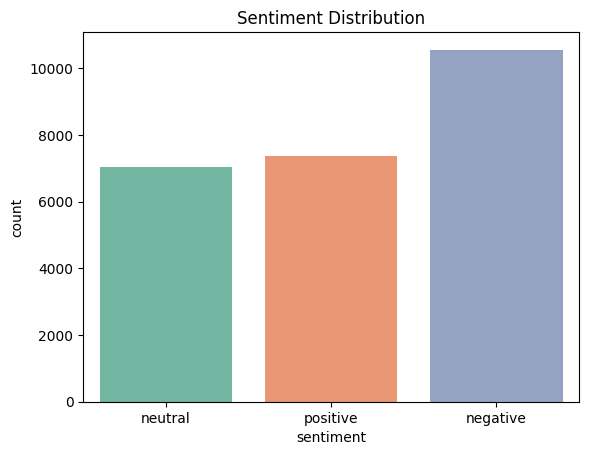

<ipython-input-11-5e73d0307f19>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion', data=my_work, palette='coolwarm') # Created another countplot to visualize the distribution of the emotions in the dataset


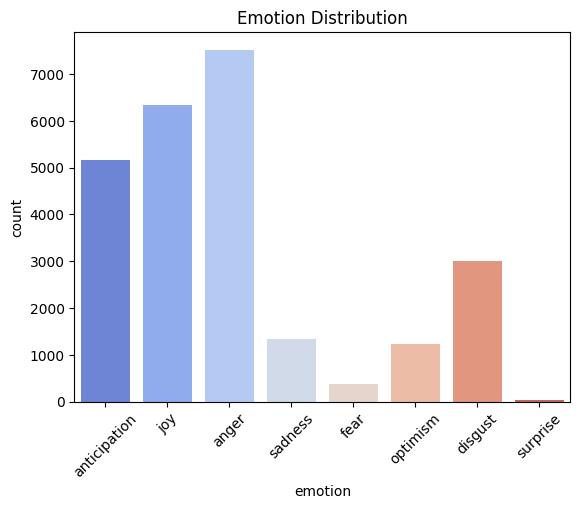

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment distribution
sns.countplot(x='sentiment', data=my_work, palette='Set2')  # Created a countplot to visualize the distribution of sentiment labels ( positive, neutral, and negative ) in the dataset.
plt.title('Sentiment Distribution')
plt.show()

# Emotion distribution
sns.countplot(x='emotion', data=my_work, palette='coolwarm') # Created another countplot to visualize the distribution of the emotions in the dataset
plt.title('Emotion Distribution')
plt.xticks(rotation=45)
plt.show()



sentiment   negative  neutral  positive
Datetime                               
2022-01-01        11       11        15
2022-01-02        18        8         1
2022-01-03       175       55        28
2022-01-04       124       44        42
2022-01-05        61       23        47
...              ...      ...       ...
2022-09-26        35       18        25
2022-09-27        34       17        19
2022-09-28        42       26        33
2022-09-29        37       29        28
2022-09-30        53       29        25

[273 rows x 3 columns]


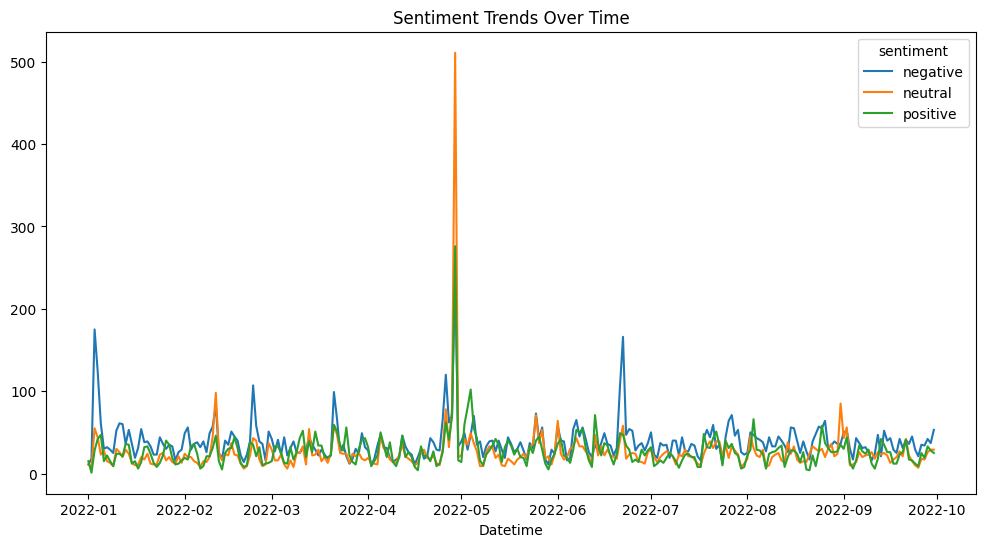

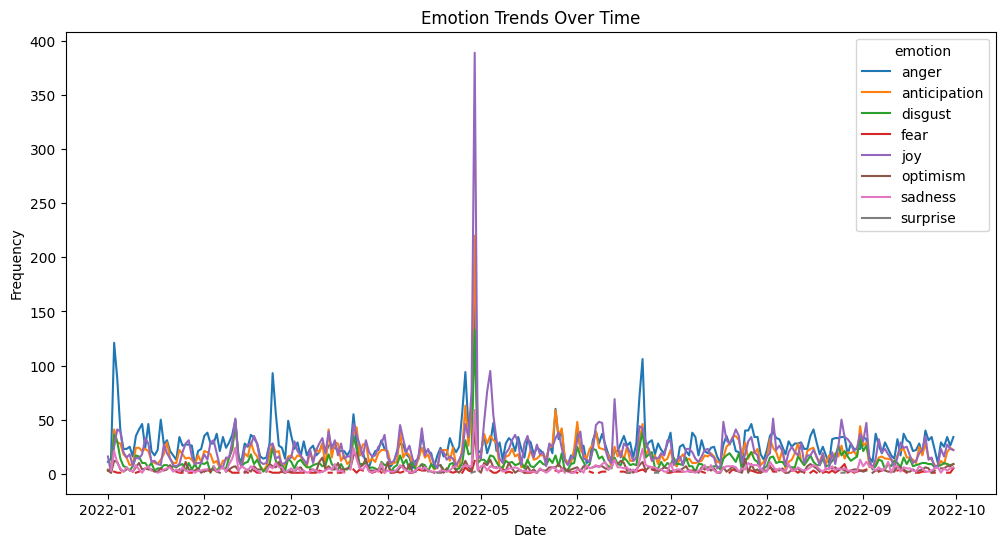

In [ ]:
# Sentiment and Emotion Distribution.

# Time trends
my_work['Datetime'] = pd.to_datetime(my_work['Datetime'])  # Converted Datetime column to a pandas datetime format
time_trends = my_work.groupby([my_work['Datetime'].dt.date, 'sentiment']).size().unstack()
print(time_trends)
time_trends.plot(figsize=(12, 6), title='Sentiment Trends Over Time')
plt.show()



my_work['Datetime'] = pd.to_datetime(my_work['Datetime'])
# Group by date and emotion
time_trends = my_work.groupby([my_work['Datetime'].dt.date, 'emotion']).size().unstack()

# Plot trends
time_trends.plot(figsize=(12, 6), title='Emotion Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()


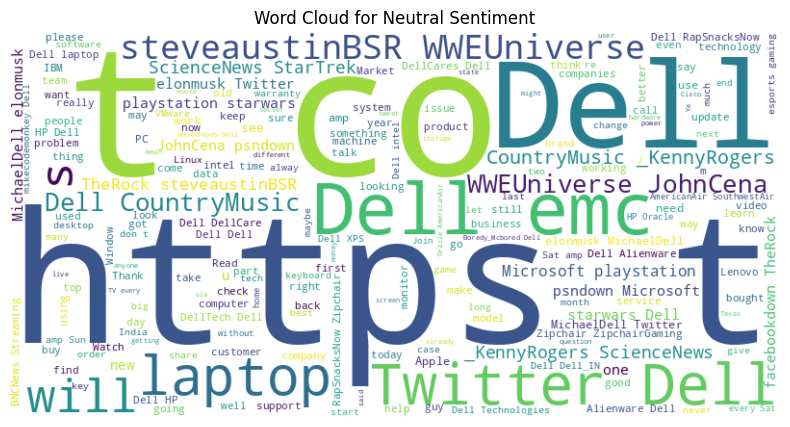

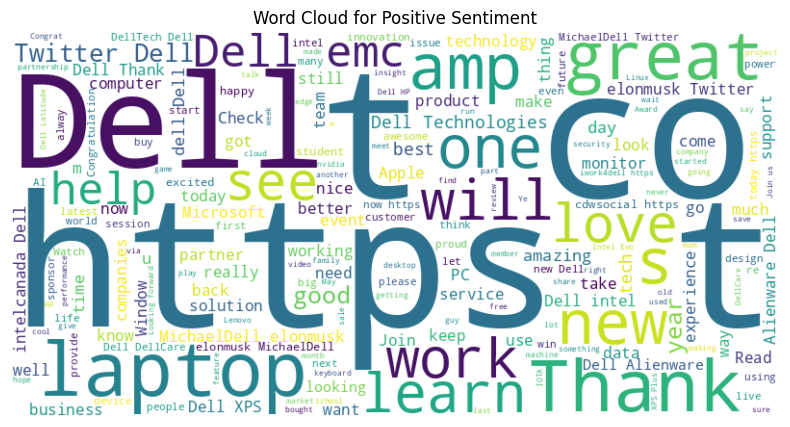

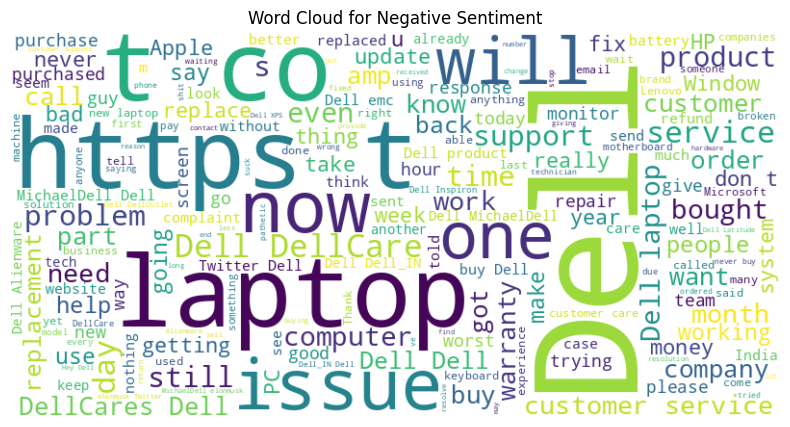

In [ ]:
from wordcloud import WordCloud

# Word clouds generation for each sentiment
for sentiment in my_work['sentiment'].unique():
    text = ' '.join(my_work[my_work['sentiment'] == sentiment]['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.axis('off')
    plt.show()


### Word Cloud for **positive sentiment** :    
This was generated for my textual data assosciated with positive sentiments. The most frequently occuring words were highlighted by the visualization, the larger font sizes represent higher frequencies. This aids with the provision of insights into themes and terms, which are important for positive sentiments in the dataset.

### Word Cloud for **Negative sentiment** :  
This helped to reveal vital areas of dissatisfaction and frequently mentioned issues. Words like "serive" , "bad", problem" were observed to dominate the cloud, and this points to frustrations with the perofrmance of products or the poor support for customers.

### Word Cloud for **Neutral sentiment** :
This helped to showcase balanced terms that brings general observations to the light, highlights mentions, or even queries about the products manufactured by Dell and its services. Words like "price", "laptop", "Dell" appaer often and this indicates factual or deescriptive mentions without the necessary use of emotions.
Terms like "information", "feedback" which points to discussions or inquiries about the details of products and their copmparisons were included in the Neutral sentiment.

The need for Dell to create forums to aid with engagements with users, in order to address qustions and provide information that are highly valuable. This will help transform neutral opinions into positive ones.

<ipython-input-14-d86536c86235>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='Text_Length', data=my_work, palette='Set2')


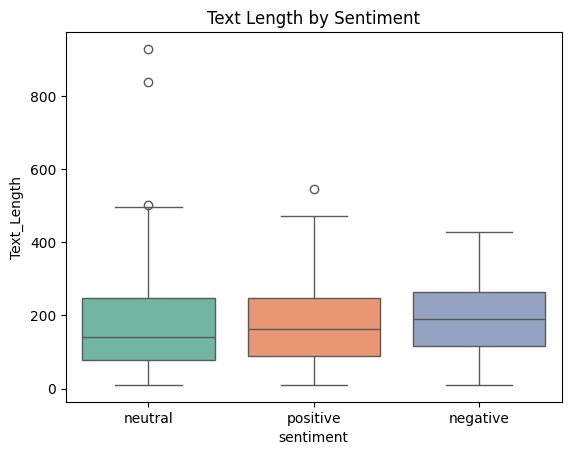

In [ ]:
my_work['Text_Length'] = my_work['Text'].apply(len)

# Distribution of plot text length by sentiment
sns.boxplot(x='sentiment', y='Text_Length', data=my_work, palette='Set2')
plt.title('Text Length by Sentiment')
plt.show()


<ipython-input-15-d9481ab5a9e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='sentiment_score', data=my_work, palette='Set2')


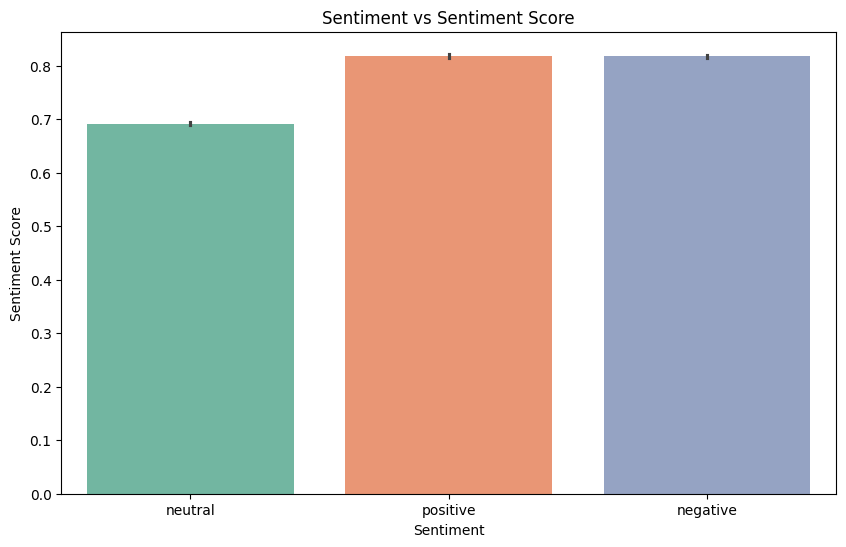

In [ ]:
# Barplot for sentiment vs sentiment score
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='sentiment_score', data=my_work, palette='Set2')
plt.title('Sentiment vs Sentiment Score')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Score')
plt.show()

<ipython-input-16-5ac9c1f195b2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='emotion_score', data=my_work, palette='coolwarm')


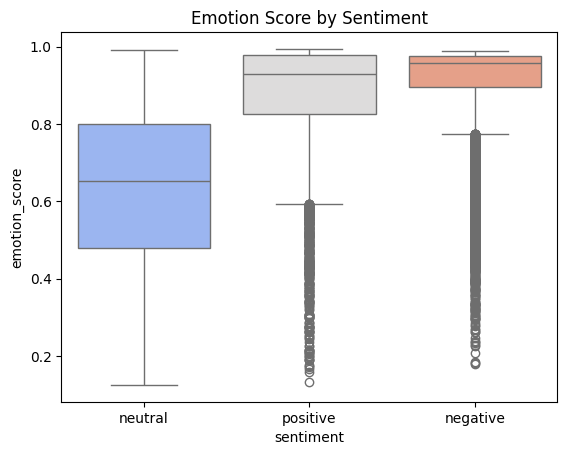

In [ ]:
# Boxplot of emotion scores by sentiment
sns.boxplot(x='sentiment', y='emotion_score', data=my_work, palette='coolwarm')
plt.title('Emotion Score by Sentiment')
plt.show()


In [ ]:
# Select only numeric columns
numeric_columns = my_work.select_dtypes(include=['number']).columns

In [ ]:
print(numeric_columns)

Index(['Unnamed: 0', 'Tweet Id', 'sentiment_score', 'emotion_score',
       'Sentiment_Label', 'Text_Length'],
      dtype='object')


In [ ]:
# Calculate the correlation matrix
correlation_matrix = my_work[numeric_columns].corr()

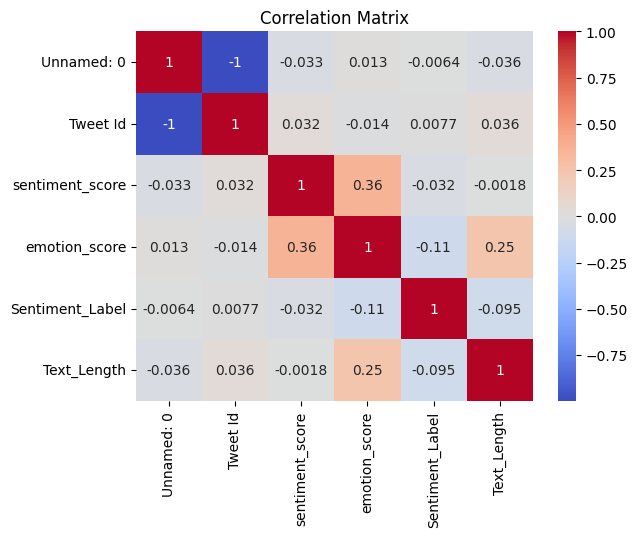

In [ ]:
# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
my_work.columns   # I listed all the column names in my dataframe

Index(['Unnamed: 0', 'Datetime', 'Tweet Id', 'Text', 'Username', 'sentiment',
       'sentiment_score', 'emotion', 'emotion_score', 'Cleaned_Text',
       'Sentiment_Label', 'Text_Length'],
      dtype='object')

In [ ]:
# Top 10 users contributing to the dataset
top_users = my_work['Username'].value_counts().head(10)
print(top_users)

Username
johnphillips34     334
jkline120          174
JordanJamesEtem    117
mrlarryridley      111
AiThority          104
solucionetcp        99
jonathanj92389      94
AnsgarTOdinson      79
mikecodemonkey      75
Bradley72901397     56
Name: count, dtype: int64


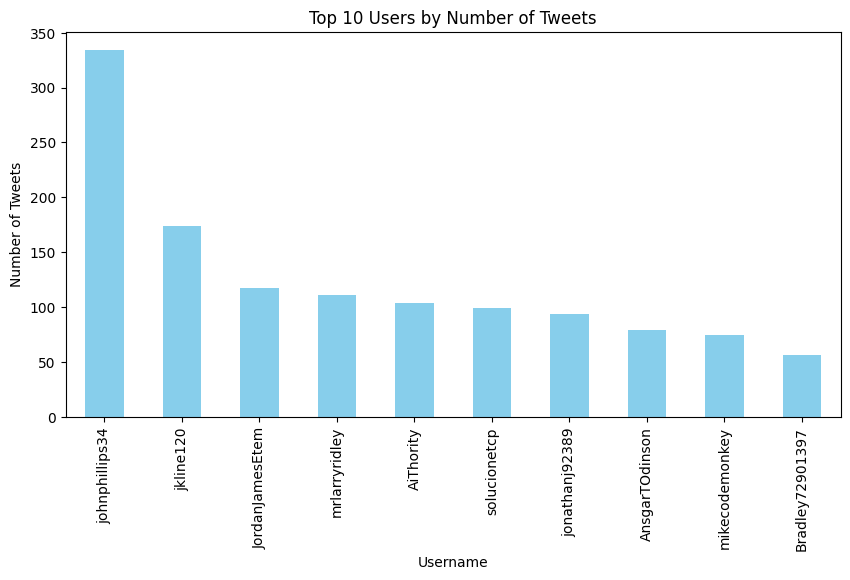

In [ ]:
# Bar plot for top users
top_users.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Top 10 Users by Number of Tweets')
plt.xlabel('Username')
plt.ylabel('Number of Tweets')
plt.show()

# **Feature Engineering**

Two feature engineering techniques were featured :


1.  **TF-IDF ( Frequnecy-Based Method )** : It measures the impoortance of words in tweets that are relative to the dataset.
2.   **Word2Vec ( Probaility-Based Method )** : Dense vector representation of words are generated

The textual data is transformed into numerical representation using these two techniques (TF-IDF and Word2Vec), preparing it for usage in machine learning models. Word2Vec offers dense, context-aware word embeddings, whereas TF-IDF captures word importance in respect to the overall corpus.





In [ ]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Print the stopwords
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Print the first few rows of the 'Cleaned_Text' column to see the text before removing stopwords
print(my_work['Cleaned_Text'].head(10))
print(my_work['Cleaned_Text'].tail(10))

0          whatif qwerty were modified for programm...
1        shes getting a new  laptop when the one sh...
2    as  celebrates its <num>th anniversary bob fal...
3     your customer service is horrible especially ...
4                        give the man what he paid for
5    the screenshot is acting up from the website o...
6                                 alien shaped omurice
7    cooking stream day ty to  for sponsoring this ...
8                                           beautiful 
9    whats your biggest data management challenge  ...
Name: Cleaned_Text, dtype: object
24960    <num> voice life is already ahead of the game ...
24961    <num>  seen it but its not as good as the u<nu...
24962     currently downloading all my editing programs...
24963      this is why you buy   ive worked for them an...
24964     <num>   and i love the doublespeak  alienware...
24965    <num>   i wouldnt even know what to blow my wh...
24966       i didnt really leave for the ethical reason...
249

In [ ]:
def remove_stopwords(text):
    words = text.split()  # Split text into words
    output = " ".join(word for word in words if word.lower() not in stopwords)
    return output

my_work['Cleaned_Text'] = my_work['Cleaned_Text'].apply(remove_stopwords)


In [ ]:
my_work['Cleaned_Text']= my_work['Cleaned_Text'].apply(lambda x:remove_stopwords(x))

In [ ]:
print(my_work['Cleaned_Text'].head(10))
print(my_work['Cleaned_Text'].tail(10))

0    whatif qwerty modified programmers things like...
1    shes getting new laptop one one <num><num> yea...
2    celebrates <num>th anniversary bob faletra spo...
3    customer service horrible especially agent sye...
4                                        give man paid
5    screenshot acting website latitude <num> lapto...
6                                 alien shaped omurice
7    cooking stream day ty sponsoring stream ill ma...
8                                            beautiful
9    whats biggest data management challenge cloud ...
Name: Cleaned_Text, dtype: object
24960    <num> voice life already ahead game terms scal...
24961               <num> seen good u<num>q probably price
24962           currently downloading editing programs new
24963    buy ive worked ive always looked marketing pro...
24964    <num> love doublespeak alienware recommended d...
24965    <num> wouldnt even know blow whistle people fo...
24966    didnt really leave ethical reasons personal ho...
249

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()  # Used this to reduce words to their base roots form.

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatizer function
def lemmatizer(text):
    # Print the original sentence (full sentence before lemmatization)
    print("Before Lemmatization:", text)

    # Split the text into words and lemmatize each word
    lemmatized_words = " ".join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])

    # Print the lemmatized sentence (full sentence after lemmatization)
    print("After Lemmatization:", lemmatized_words)

    return lemmatized_words

# Apply the lemmatizer to the first 5 rows of the 'Cleaned_Text' column
print("First 5 rows before and after lemmatization:")
for index, text in my_work['Cleaned_Text'].head(10).items():
    lemmatizer(text)

# Apply the lemmatizer to the last 5 rows of the 'Cleaned_Text' column
print("\nLast 5 rows before and after lemmatization:")
for index, text in my_work['Cleaned_Text'].tail(10).items():
    lemmatizer(text)


First 5 rows before and after lemmatization:
Before Lemmatization: whatif qwerty modified programmers things like brackets parens quotes operators etc moved middle near gh splitting leftright brackets separate hands relieving less dextrous pinky finger
After Lemmatization: whatif qwerty modified programmer thing like bracket parens quote operator etc moved middle near gh splitting leftright bracket separate hand relieving less dextrous pinky finger
Before Lemmatization: shes getting new laptop one one <num><num> years old triple price though much higher utility <url>
After Lemmatization: shes getting new laptop one one <num><num> year old triple price though much higher utility <url>
Before Lemmatization: celebrates <num>th anniversary bob faletra spoke milestones companies personalities helped build channel <url> crn<num> podcast internationalpodcastday
After Lemmatization: celebrates <num>th anniversary bob faletra spoke milestone company personality helped build channel <url> crn<nu

In [ ]:
# Randomly sample 5 texts from each sentiment category
positive_sample = my_work[my_work['sentiment'] == 'positive']['Text'].sample(1)
negative_sample = my_work[my_work['sentiment'] == 'negative']['Text'].sample(1)
neutral_sample = my_work[my_work['sentiment'] == 'neutral']['Text'].sample(1)


In [ ]:
# Randomly sample 5 texts from each sentiment category and print them
positive_sample = my_work[my_work['sentiment'] == 'positive']['Cleaned_Text'].sample(1)
negative_sample = my_work[my_work['sentiment'] == 'negative']['Cleaned_Text'].sample(1)
neutral_sample = my_work[my_work['sentiment'] == 'neutral']['Cleaned_Text'].sample(1)

# Display random samples
print("Random Sample of Positive Sentiment Texts:")
print(positive_sample.iloc[0], '\n')  # Display the actual sentence from the series

print("Random Sample of Negative Sentiment Texts:")
print(negative_sample.iloc[0], '\n')  # Display the actual sentence from the series

print("Random Sample of Neutral Sentiment Texts:")
print(neutral_sample.iloc[0], '\n')  # Display the actual sentence from the series


Random Sample of Positive Sentiment Texts:
proud say freshstance proud partner dell weve supplying dell servers pcs laptops <num> years customers hertfordshire london around world <url> 

Random Sample of Negative Sentiment Texts:
frustrating suffer help basic services running properly even google people say uses high invest <num>k run google smoothly dont sell sell right stuff <url> 

Random Sample of Neutral Sentiment Texts:
<num> <num> apple silicon macbooks basically cooking death yeah made good progress apple never seen gold standard thermals least 



In [ ]:
# Randomly sample 5 texts from each sentiment category
neutral_sample = my_work[my_work['sentiment'] == 'neutral']['Cleaned_Text'].sample(5)
negative_sample = my_work[my_work['sentiment'] == 'negative']['Cleaned_Text'].sample(5)

# Display random samples for neutral and negative sentiment texts
print("Random Sample of Neutral Sentiment Texts:")
for text in neutral_sample:
    print(text, '\n')  # Display each sentence from the sample

print("Random Sample of Negative Sentiment Texts:")
for text in negative_sample:
    print(text, '\n')  # Display each sentence from the sample


Random Sample of Neutral Sentiment Texts:
lavazec c et al <num> carboxypeptidases b anopheles gambiae targets plasmodium falciparum transmissionblocking vaccine infect immun <num><num><num><num> healthtech 

would enough third top range dell laptop bought <num> years ago last 

<num> man im gonna need come remote control power button 

pls save date next worktrends twitter chat wed july <num>th <num><num><num><num> pm et topic empathetic leadership take peek qs eq skills see futureofwork <url> 

<num> see sir 

Random Sample of Negative Sentiment Texts:
buying dell laptop punishment delllaptop dellplsdontcheat <num>k laptop fingerprint scanner <num><num>lacs laptop plastic shit 

computers wack 

ever planning get product next time get thing got 

gop putting money nra safety children single one voted gun control one guilty holding oath protect us know conservative maybe time reevaluate prolife uvalde 

eight days delayed less <num> hours couldve expidited deliver april <num>th <num> h

In [ ]:
 import pandas as pd

# Define the list of keywords for negative and neutral complaints, including new ones
negative_keywords = [
    'customer service', 'support', 'warranty', 'repair', 'replacement', 'problem',
    'issue', 'tech support', 'overheating', 'shut down', 'slow', 'incompetent',
    'frustrating', 'annoying', 'unacceptable', 'poor', 'faulty', 'failure', 'broken',
    'error', 'lag', 'noise', 'trackpad', 'quality', 'recall', 'danger', 'fire risk',
    'shock hazard', 'fire hazard', 'xps', 'overheating', 'xps', 'over heating'
]

neutral_keywords = [
    'service request', 'product', 'laptop', 'device', 'parts', 'support', 'request',
    'product information', 'status', 'repair', 'check', 'order', 'shipping', 'payment', 'delivery',
    'xps', 'overheating', 'xps', 'over heating'
]

# Function to search for keywords in a given text
def contains_keywords(text, keywords):
    return any(keyword.lower() in text.lower() for keyword in keywords)

# Search for negative and neutral comments
negative_comments = my_work[my_work['Cleaned_Text'].apply(lambda x: contains_keywords(x, negative_keywords))]
neutral_comments = my_work[my_work['Cleaned_Text'].apply(lambda x: contains_keywords(x, neutral_keywords))]

# Display random samples of 5 full sentences for negative and neutral comments
print("Random Sample of Negative Sentiment Texts:")
for text in negative_comments.sample(5)['Cleaned_Text']:
    print(text, '\n')  # Print each full text from the sample

print("Random Sample of Neutral Sentiment Texts:")
for text in neutral_comments.sample(5)['Cleaned_Text']:
    print(text, '\n')  # Print each full text from the sample


Random Sample of Negative Sentiment Texts:
purchased laptop extended offer warranty <num> july <num> also per instruction registered offer website till application process attached bill application proof attachment <url> 

service tag <num>xz<num>yh<num> kind support giving <num> days passed single call support bad sales 

purchased dell inpiron <num> laptop nov <num> hinge problem called dell support ordered hinge parts waiting <num> months part arrived complained consumer forum<num><num> dell dellhaifell 

although fix involves shipping laptop two weeks traveling saturday kind need also issue exacerbated closing monitor ship oy vey 

tech companies like committed supporting collaborating hbcus hbcu partnership challenge learn <url> 

Random Sample of Neutral Sentiment Texts:
update seems like problem xps rather problem dell laptop something attached via usbc like headset hard drive wifi connectivity seems impacted anyone similiar issues <url> 

ive done <num><num> repairs dell always

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Keeps only the top 5000 most frequent terms
X_tfidf = vectorizer.fit_transform(my_work['Cleaned_Text']).toarray() # The fit.transform is used to learn the vocabulary and transform the text into a term-frequency inverse document frequency matrix. Its result is a 2D array.



# Word2Vec
tokenized_text = [text.split() for text in my_work['Cleaned_Text']]     # Here, the cleaned text data is tokenized ( split into words ) by using a list of comprehensions: each tweet is split into words.
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1)  # Each word will be represented by a 100-dimensional vector, with a 5 context window size making sure even words that appear once in the corpus are included.
X_w2v = np.array([np.mean([word2vec_model.wv[word] for word in text if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for text in tokenized_text])  # This results to a 2-D numpy array where each row corresponds to a tweet and each column corresponds to one of the averaged embedded word ( 100-dimensional vectors )


# Model evelopment

The following models were trained using both TF-IDF and Word2Vec represnetations:

*   Logistic Regression
*   Random Forest
*   Support Vector Machine ( SVM )
*   Naive Bayes
*   Recurral Neural Network ( RNN )
*   Long-Short Term Memory ( LSTM )













# Logistic regression

The reason behind my choice on using the logistic regression model lies in the fact that it is a straightforward model that is interpretable which therefore, makes it a good foundation or baseline for sentiment analysis tasks. Given that my dataset has a size of around 25,000 rows, logistic regression is really efficient and the model can swiftly produce meanigful results for text classification into sentiment categories. It works well with TF-IDF or word embeddings as the input features.

Its suitability aligns easily and seamlessly with the characteristics of my dataset in which i used "my_work.shape" to see that i have (24,970 rows, 8 columns) as Logistic regression modelswork perfectly for relatively small to medium sized dataset. It delivers fast training and is particlularly useful when one wants a quick model to assss initial performance.



In [ ]:
from sklearn.linear_model import LogisticRegression

## Logistic regression ( TF - IDF )

In [ ]:
sample_texts = [
    "This laptop is terrible, it overheats all the time.",  # Negative
    "I love my new laptop, it's really fast and smooth.",   # Positive
    "I do not know what to think."       # Neutral
]
# Tokenize the texts (splitting by space)
sample_tokenized_texts = [text.split() for text in sample_texts]   # for word2vec model


In [ ]:

from sklearn.model_selection import train_test_split

# Splitting of data into training and testing set
y = my_work['Sentiment_Label']
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_w2v, X_test_w2v, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, random_state=42)

# Train the Logistic Regression modelfor tfidf
log_reg_model_tfidf = LogisticRegression(max_iter=1000)
log_reg_model_tfidf.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_log_reg_tfidf = log_reg_model_tfidf.predict(X_test_tfidf)

# Print classification report
print("Logistic Regression (TF-IDF) Classification Report:\n", classification_report(y_test, y_pred_log_reg_tfidf))

accuracy_log_reg_tfidf = accuracy_score(y_test, y_pred_log_reg_tfidf)
print(f"Accuracy of Logistic Regression ( TFIDF): {accuracy_log_reg_tfidf:.2f}")



Logistic Regression (TF-IDF) Classification Report:
               precision    recall  f1-score   support

          -1       0.80      0.85      0.83      2065
           0       0.67      0.63      0.65      1468
           1       0.77      0.74      0.75      1461

    accuracy                           0.75      4994
   macro avg       0.75      0.74      0.74      4994
weighted avg       0.75      0.75      0.75      4994

Accuracy of Logistic Regression ( TFIDF): 0.75


In [ ]:
# Preprocess and predict sentiment using Logistic Regression (TF-IDF model)
for text in sample_texts:
    sample_vector = vectorizer.transform([text])  # Convert the text to TF-IDF vector
    prediction = log_reg_model_tfidf.predict(sample_vector)  # Predict sentiment

    # Output the predicted sentiment
    if prediction == -1:
        print(f"Text: {text} => Predicted Sentiment: Negative")
    elif prediction == 0:
        print(f"Text: {text} => Predicted Sentiment: Neutral")
    else:
        print(f"Text: {text} => Predicted Sentiment: Positive")

Text: This laptop is terrible, it overheats all the time. => Predicted Sentiment: Negative
Text: I love my new laptop, it's really fast and smooth. => Predicted Sentiment: Positive
Text: I do not know what to think. => Predicted Sentiment: Neutral


## Logistic regression ( Word2Vec )

In [ ]:
# Train the Logistic Regression model for word2vec

log_reg_model_w2v = LogisticRegression(max_iter=1000)
log_reg_model_w2v.fit(X_train_w2v, y_train)

# Predict on the test set
y_pred_log_reg_w2v = log_reg_model_w2v.predict(X_test_w2v)

# Print classification report
print("Logistic Regression (Word2Vec) Classification Report:\n", classification_report(y_test, y_pred_log_reg_w2v))

accuracy_log_reg_w2v = accuracy_score(y_test, y_pred_log_reg_w2v)
print(f"Accuracy of Logistic Regression ( WORD2VEC): {accuracy_log_reg_w2v:.2f}")

Logistic Regression (Word2Vec) Classification Report:
               precision    recall  f1-score   support

          -1       0.70      0.81      0.75      2065
           0       0.56      0.41      0.47      1468
           1       0.62      0.65      0.64      1461

    accuracy                           0.64      4994
   macro avg       0.63      0.62      0.62      4994
weighted avg       0.63      0.64      0.63      4994

Accuracy of Logistic Regression ( WORD2VEC): 0.64


In [ ]:
# Function to get average word2vec vector for a sentence
def get_sentence_vector(text, word2vec_model):
    # Use word2vec model to get embeddings
    word_vectors = [word2vec_model.wv[word] for word in text if word in word2vec_model.wv]
    if len(word_vectors) == 0:
        return np.zeros(word2vec_model.vector_size)  # Return zero vector if no words are in the model
    return np.mean(word_vectors, axis=0)  # Average the word vectors

# Convert sample texts to sentence vectors (averaging word embeddings)
sample_vectors = [get_sentence_vector(text, word2vec_model) for text in sample_tokenized_texts]

# Convert the sentence vectors to a 2D array to pass to the model (for predictions)
sample_vectors = np.array(sample_vectors)

# Predict sentiment using the trained Logistic Regression (Word2Vec model)
for text, vector in zip(sample_texts, sample_vectors):
    prediction = log_reg_model_w2v.predict([vector])  # Predict sentiment using Word2Vec features


    # Output the predicted sentiment
    if prediction == -1:
        print(f"Text: {text} => Predicted Sentiment: Negative")
    elif prediction == 0:
        print(f"Text: {text} => Predicted Sentiment: Neutral")
    else:
        print(f"Text: {text} => Predicted Sentiment: Positive")

Text: This laptop is terrible, it overheats all the time. => Predicted Sentiment: Negative
Text: I love my new laptop, it's really fast and smooth. => Predicted Sentiment: Positive
Text: I do not know what to think. => Predicted Sentiment: Neutral


## Logistic regression results and observation ( TF - IDF ) and ( Word2Vec )

NOTE : X_tfidf and X_w2v represent features that are derived from TF-IDF and word2vec respectively, while y contains the setiment labels.

### Logistic regression with TF-IDF :

*  Accuracy : 75%
*  Classification report :  
      *   Precision : This measures how many of the instances predicted as a specific class ( e.g., positive, negative , neutral ) are actually of that class.

     *   Recall : This measures how many of the actual instances of a class were correctly predicted.

     *   F1-Score : This is the harmonic mean of precision and recall, it balances the two metrics. Higher values will indicate better model performances.

For TF-IDF observations, the model clearly had a better perfomance with an accuracy of 75%. The classifcation report shows a reasonable balance across all three classes, with negative (-1 ) and positive ( 1 ) sentiments performing relatively well in terms of precision, recall and F1-score, while the neutral ( 0 ) class performed a bit weaker, especially in terms of recall ( 0.63).

### Logistic Regression with Word2Vec :   

*   Accuracy : 64%
*   Classification Report :

    *   The word2vec model accuracy is lower than the TF-IDF model, at 64%.
    *   Precision and recall for the neutral ( 0 ) sentiment are notably lower with Word2Vec. The model struggles with distinguishing neural tweets, which resulted in a low F1-score for that class.
    *   The model tends to perform better in the identification of negative ( -1 ) sentiments, but still not as effectively as with TF-IDF.







# Random Forest

My decision to use random forest machine learning model is because it works well for datasets with many features and can handle complex inteactions in the data, which is important for semantics in text capture. Random forest is an ensemble model that combines the predictions of many decision trees, making it more robust then the individual decision trees.
Random forest can efficiently handle the number of features that will be generated by text vectorization methods.

Random Forest is suitable for medium sized dataset dataset and is powerful in its ability to capture non-linear relationships. It also gives the provision of feature importance, which is useful for the understanding of which words or features that drive sentiment predictions.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Random Forest TF - IDF

In [ ]:

# Train the Random Forest model for tfidf frequency based model
rf_model_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_tfidf.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_rf_tfidf = rf_model_tfidf.predict(X_test_tfidf)

# Print classification report
print("Random Forest (TF-IDF) Classification Report:\n", classification_report(y_test, y_pred_rf_tfidf))

RFaccuracy_tfidf = accuracy_score(y_test, y_pred_rf_tfidf)
print(f"Accuracy: {RFaccuracy_tfidf:.2f}")


Random Forest (TF-IDF) Classification Report:
               precision    recall  f1-score   support

          -1       0.75      0.85      0.80      2065
           0       0.66      0.60      0.63      1468
           1       0.77      0.69      0.73      1461

    accuracy                           0.73      4994
   macro avg       0.73      0.71      0.72      4994
weighted avg       0.73      0.73      0.73      4994

Accuracy: 0.73


In [ ]:
# Predict sentiment for TF-IDF model
print("\nPredictions using Random Forest (TF-IDF):")
for text in sample_texts:
    sample_vector_tfidf = vectorizer.transform([text])  # Convert the text to TF-IDF vector
    prediction_tfidf = rf_model_tfidf.predict(sample_vector_tfidf)  # Predict sentiment using TF-IDF features

    if prediction_tfidf == -1:
        print(f"Text: {text} => Predicted Sentiment: Negative")
    elif prediction_tfidf == 0:
        print(f"Text: {text} => Predicted Sentiment: Neutral")
    else:
        print(f"Text: {text} => Predicted Sentiment: Positive")


Predictions using Random Forest (TF-IDF):
Text: This laptop is terrible, it overheats all the time. => Predicted Sentiment: Negative
Text: I love my new laptop, it's really fast and smooth. => Predicted Sentiment: Positive
Text: I do not know what to think. => Predicted Sentiment: Neutral


## Random Forest ( Word2Vec )

In [ ]:
# Train the Random Forest model for word2vec probability model

rf_model_w2v = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_w2v.fit(X_train_w2v, y_train)

# Predict on the test set
y_pred_rf_w2v = rf_model_w2v.predict(X_test_w2v)

# Print classification report
print("Random Forest (Word2Vec) Classification Report:\n", classification_report(y_test, y_pred_rf_w2v))

RFaccuracy_w2v = accuracy_score(y_test, y_pred_rf_w2v)
print(f"Accuracy: {RFaccuracy_w2v:.2f}")

Random Forest (Word2Vec) Classification Report:
               precision    recall  f1-score   support

          -1       0.70      0.83      0.76      2065
           0       0.62      0.43      0.51      1468
           1       0.62      0.65      0.64      1461

    accuracy                           0.66      4994
   macro avg       0.65      0.64      0.63      4994
weighted avg       0.65      0.66      0.65      4994

Accuracy: 0.66


In [ ]:
# Predict sentiment for Word2Vec model
print("\nPredictions using Random Forest (Word2Vec):")
for text in sample_texts:
    tokenized_text = text.split()  # Tokenize the text
    sample_vector_w2v = np.mean([word2vec_model.wv[word] for word in tokenized_text if word in word2vec_model.wv] or [np.zeros(word2vec_model.vector_size)], axis=0)  # Average Word2Vec embeddings
    prediction_w2v = rf_model_w2v.predict([sample_vector_w2v])  # Predict sentiment using Word2Vec features

    if prediction_w2v == -1:
        print(f"Text: {text} => Predicted Sentiment: Negative")
    elif prediction_w2v == 0:
        print(f"Text: {text} => Predicted Sentiment: Neutral")
    else:
        print(f"Text: {text} => Predicted Sentiment: Positive")


Predictions using Random Forest (Word2Vec):
Text: This laptop is terrible, it overheats all the time. => Predicted Sentiment: Neutral
Text: I love my new laptop, it's really fast and smooth. => Predicted Sentiment: Positive
Text: I do not know what to think. => Predicted Sentiment: Neutral


## Random forest results and observation ( TF - IDF ) and ( Word2Vec )

### Random Forest with TF - IDF :  

*   Accuracy : 73%
*   Classification Report :
    *   Positive sentiment ( 1 ) : Balanced precision ( 0.79 ) and recall ( 0.66 ), showing reasonable performance.
    *   Neutral sentiment ( 0 ) : Modertae performance with lower recall ( 0.56 ), which suggests some difficulty in identifying neutral tweets correctly.
    *   Negative sentiment ( -1 ) : High recall ( 0.89 ) and strong precision ( 0.71 ), which inidcates the model excels at identifying tweets that are negative.
    *   Macro average F1-score : 0.71, reflecting a balanmced performance across all classes.


### Random Forest with Word2Vec :

*   Accuracy : 69%
*   Classification Report :

    *   Positive sentiment ( 1 ) : A moderate performance with an F1 score of 0.66.
    *   Neutral sentiment ( 0 ) : This means weaker results with a recall of 0.51 and precision of 0.63, which indicates challenges i identifying neutral tweets.
    *   Negative sentiment ( -1 ) : A good performance with a precision ( 0.71 ) and recall ( 0.84 )     
    *   Macro average F1-score : 0.67, which is slightly lower than the TF-IDF model, indicating weaker overall performance.







# Support Vector Machine ( SVM )

Support vector machines are owerful for feature spaces that have a high dimension, which are common in classification tasks. With the size of my dataset, SVMs acn easily capture complex decision boundaries between classes of sentiments ( postive, negative, neutral ) effectively. SVMs generally, are known to perform well with feature represntations like TF-IDF (Frequency based method ) , which is often used in sentiment analysis.

Support vector machines work well for medium sized datasets and performs well withy linear and non-linear classification problems. It's particluarly helpful when the data has intricate patterns that has to be captured.

In [ ]:
from sklearn.svm import SVC

## Support Vector Machine ( SVM ) TF - IDF


In [ ]:
# Train the SVM model for tfidf frequency based conversion
svm_model_tfidf = SVC(kernel='linear')
svm_model_tfidf.fit(X_train_tfidf, y_train)

# Predict on the test set for tfidf frequency baased conversion
y_pred_svm_tfidf = svm_model_tfidf.predict(X_test_tfidf)

# Print classification report
print("SVM (TFIDF) Classification Report:\n", classification_report(y_test, y_pred_svm_tfidf))

accuracy_svm_tfidf = accuracy_score(y_test, y_pred_svm_tfidf)
print(f"Accuracy of Support Vector Machine ( TFIDF): {accuracy_svm_tfidf:.2f}")

SVM (TFIDF) Classification Report:
               precision    recall  f1-score   support

          -1       0.81      0.84      0.82      2065
           0       0.65      0.65      0.65      1468
           1       0.77      0.73      0.75      1461

    accuracy                           0.75      4994
   macro avg       0.74      0.74      0.74      4994
weighted avg       0.75      0.75      0.75      4994

Accuracy of Support Vector Machine ( TFIDF): 0.75


In [ ]:
# Predict sentiment for the sample texts using SVM (TF-IDF)
print("\nPredictions using Support Vector Machine (TF-IDF):")
for text in sample_texts:
    sample_vector_tfidf = vectorizer.transform([text])  # Convert the text to TF-IDF vector

    # Convert sparse matrix to dense matrix (fix the error)
    sample_vector_tfidf_dense = sample_vector_tfidf.toarray()

    # Predict sentiment using TF-IDF features (dense matrix)
    prediction_tfidf = svm_model_tfidf.predict(sample_vector_tfidf_dense)

    # Output the predicted sentiment
    if prediction_tfidf == -1:
        print(f"Text: {text} => Predicted Sentiment: Negative")
    elif prediction_tfidf == 0:
        print(f"Text: {text} => Predicted Sentiment: Neutral")
    else:
        print(f"Text: {text} => Predicted Sentiment: Positive")


Predictions using Support Vector Machine (TF-IDF):
Text: This laptop is terrible, it overheats all the time. => Predicted Sentiment: Negative
Text: I love my new laptop, it's really fast and smooth. => Predicted Sentiment: Positive
Text: I do not know what to think. => Predicted Sentiment: Neutral


## Support Vector Machine ( SVM ) Word2Vec

In [ ]:
# Train the SVM model

svm_model_w2v = SVC(kernel='linear')
svm_model_w2v.fit(X_train_w2v, y_train)

# Predict on the test set
y_pred_svm_w2v = svm_model_w2v.predict(X_test_w2v)

# Print classification report
print("SVM (Word2Vec) Classification Report:\n", classification_report(y_test, y_pred_svm_w2v))

accuracy_svm_w2v = accuracy_score(y_test, y_pred_svm_w2v)
print(f"Accuracy of Support Vector Machine ( WORD2VEC): {accuracy_svm_w2v:.2f}")

SVM (Word2Vec) Classification Report:
               precision    recall  f1-score   support

          -1       0.70      0.80      0.75      2065
           0       0.53      0.41      0.46      1468
           1       0.62      0.64      0.63      1461

    accuracy                           0.64      4994
   macro avg       0.62      0.61      0.61      4994
weighted avg       0.63      0.64      0.63      4994

Accuracy of Support Vector Machine ( WORD2VEC): 0.64


In [ ]:
# Function to convert a sentence to Word2Vec embeddings (using trained Word2Vec model)
def get_sentence_vector(text, word2vec_model):
    # Tokenize the text into words
    tokenized_text = text.split()
    # Get Word2Vec embeddings for each word and average them
    word_vectors = [word2vec_model.wv[word] for word in tokenized_text if word in word2vec_model.wv]
    if len(word_vectors) == 0:
        return np.zeros(word2vec_model.vector_size)  # Return zero vector if no words in the model
    return np.mean(word_vectors, axis=0)  # Average the word vectors

In [ ]:
# Predict sentiment for SVM model using Word2Vec
print("\nPredictions using Support Vector Machine (Word2Vec):")
for text in sample_texts:
    sample_vector_w2v = get_sentence_vector(text, word2vec_model)  # Get Word2Vec embedding
    prediction_w2v = svm_model_w2v.predict([sample_vector_w2v])  # Predict sentiment using Word2Vec features

    # Output the predicted sentiment
    if prediction_w2v == -1:
        print(f"Text: {text} => Predicted Sentiment: Negative")
    elif prediction_w2v == 0:
        print(f"Text: {text} => Predicted Sentiment: Neutral")
    else:
        print(f"Text: {text} => Predicted Sentiment: Positive")


Predictions using Support Vector Machine (Word2Vec):
Text: This laptop is terrible, it overheats all the time. => Predicted Sentiment: Negative
Text: I love my new laptop, it's really fast and smooth. => Predicted Sentiment: Positive
Text: I do not know what to think. => Predicted Sentiment: Neutral


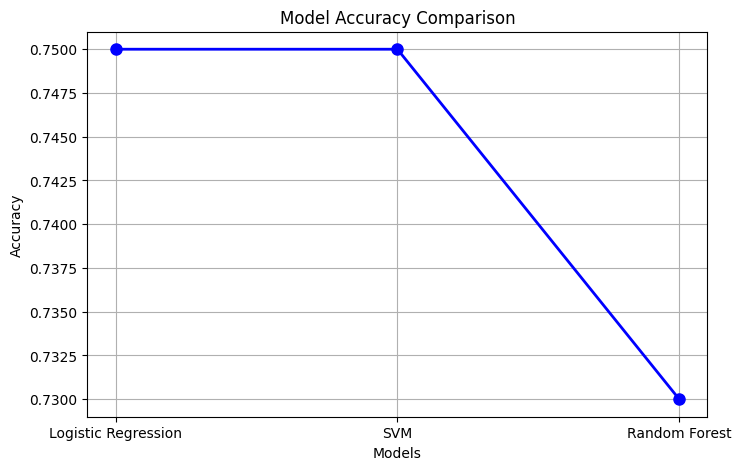

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values from my classification reports
models = ['Logistic Regression', 'SVM', 'Random Forest']
accuracies = [0.75, 0.75, 0.73]  # These are the accuracy values from my classification reports

# Create a line chart
plt.figure(figsize=(8, 5))
plt.plot(models, accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Show the plot
plt.grid(True)
plt.show()


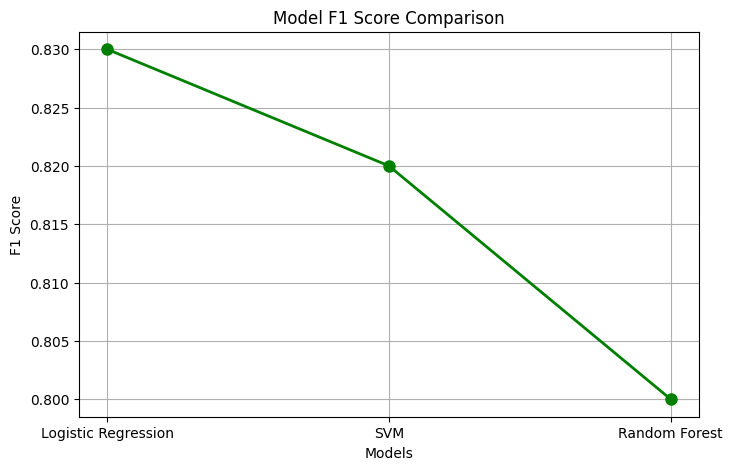

In [ ]:
import matplotlib.pyplot as plt

# F1 Score values from my classification reports
models = ['Logistic Regression', 'SVM', 'Random Forest']
f1_scores = [0.83, 0.82, 0.80]  # These are the F1 scores from my classification reports

# Create a line chart for F1 scores
plt.figure(figsize=(8, 5))
plt.plot(models, f1_scores, marker='o', color='g', linestyle='-', linewidth=2, markersize=8)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Model F1 Score Comparison')

# Show the plot
plt.grid(True)
plt.show()


# Naive Bayes

Naive Bayes isa simple but yet, an effective probabilistic model taht works well with text classification tasks like sentiment analysis. Conditional independence is assumed between the features which holds reasonably well for textual data when using TF-IDF represenatation. This model is computationally efficient , making it a good choice when fast results with moderate complexity is required.

Naive Bayes is well-suited for small to medium datasets and it is very fast. Given that sentiment analysis often involves categorical classification ( positive, negative, neutral ) , Naive Bayes is an ideal starting point for quick perfomance evealuation.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

## Naive Bayes ( TF - IDF )

In [ ]:
# Train the Naive Bayes model with TFIDF frequency
nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_nb_tfidf = nb_model_tfidf.predict(X_test_tfidf)

# Print classification report
print("Naive Bayes (TF-IDF) Classification Report:\n", classification_report(y_test, y_pred_nb_tfidf))

NBaccuracy_tfidf = accuracy_score(y_test, y_pred_nb_tfidf)
print(f"Accuracy: {NBaccuracy_tfidf:.2f}")

Naive Bayes (TF-IDF) Classification Report:
               precision    recall  f1-score   support

          -1       0.68      0.92      0.78      2065
           0       0.69      0.37      0.48      1468
           1       0.75      0.71      0.73      1461

    accuracy                           0.70      4994
   macro avg       0.70      0.67      0.66      4994
weighted avg       0.70      0.70      0.68      4994

Accuracy: 0.70


In [ ]:
# Predict sentiment for Naive Bayes model using TF-IDF
print("\nPredictions using Naive Bayes (TF-IDF):")
for text in sample_texts:
    sample_vector_tfidf = vectorizer.transform([text])  # Convert the text to TF-IDF vector
    prediction_tfidf = nb_model_tfidf.predict(sample_vector_tfidf)  # Predict sentiment using TF-IDF features

    # Output the predicted sentiment
    if prediction_tfidf == -1:
        print(f"Text: {text} => Predicted Sentiment: Negative")
    elif prediction_tfidf == 0:
        print(f"Text: {text} => Predicted Sentiment: Neutral")
    else:
        print(f"Text: {text} => Predicted Sentiment: Positive")


Predictions using Naive Bayes (TF-IDF):
Text: This laptop is terrible, it overheats all the time. => Predicted Sentiment: Negative
Text: I love my new laptop, it's really fast and smooth. => Predicted Sentiment: Positive
Text: I do not know what to think. => Predicted Sentiment: Neutral


## Naive Bayes ( Word2Vec )

In [ ]:
# Train Naive Bayes

#nb_model_w2v = MultinomialNB()
#nb_model_w2v.fit(X_train_w2v, y_train)

# Predict on the test set
#y_pred_nb_w2v = nb_model_w2v.predict(X_test_w2v)

# Print classification report
#print("Naive Bayes (Word2Vec) Classification Report:\n", classification_report(y_test, y_pred_nb_w2v))

#NBaccuracy_w2v = accuracy_score(y_test, y_pred_nb_w2v)
#print(f"Accuracy: {NBaccuracy_w2v:.2f}")


#this is not working right now because Multinomial Naive Bayes (MultinomialNB) requires all feature values in X_train to be non-negative. This algorithm is designed for discrete probability distributions (e.g., word counts or term frequencies) and cannot handle negative values in the input data.

#Since i used embeddings (Word2Vec or GloVe) for X_train, these embeddings can have negative values, which causes the issue. MultinomialNB is not suitable for dense numerical representations like Word2Vec or GloVe embeddings.

# Improvement Of TF-IDF Naive Bayes Model using Grid search

In [ ]:
# let us improve our model NB

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # Smoothing parameter
    'fit_prior': [True, False],     # Whether to learn class priors
}

In [ ]:
# Create a MultinomialNB model
nb_model = MultinomialNB()

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=nb_model,
    param_grid=param_grid,
    scoring='accuracy',  # Metric to optimize
    cv=5,  # 5-fold cross-validation
    verbose=2
)

In [ ]:
# Perform grid search
grid_search.fit(X_train_tfidf, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.4s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.4s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.4s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.4s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.4s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.4s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.4s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.4s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.4s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.4s
[CV] END ..........................alpha=0.5, fit_prior=True; total time=   0.4s
[CV] END ..........................alpha=0.5, fit

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0],
                         'fit_prior': [True, False]},
             scoring='accuracy', verbose=2)

In [ ]:
# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'alpha': 0.5, 'fit_prior': False}


In [ ]:
# Evaluate on the test set
best_model_tfidf = grid_search.best_estimator_
y_pred_nb_tfidf = best_model_tfidf.predict(X_test_tfidf)
print("Test Set Accuracy TFIDF NB best model:", accuracy_score(y_test, y_pred_nb_tfidf))
print("Classification Report:\n", classification_report(y_test, y_pred_nb_tfidf))

Test Set Accuracy TFIDF NB best model: 0.7168602322787345
Classification Report:
               precision    recall  f1-score   support

          -1       0.75      0.86      0.80      2065
           0       0.63      0.51      0.56      1468
           1       0.73      0.73      0.73      1461

    accuracy                           0.72      4994
   macro avg       0.70      0.70      0.70      4994
weighted avg       0.71      0.72      0.71      4994



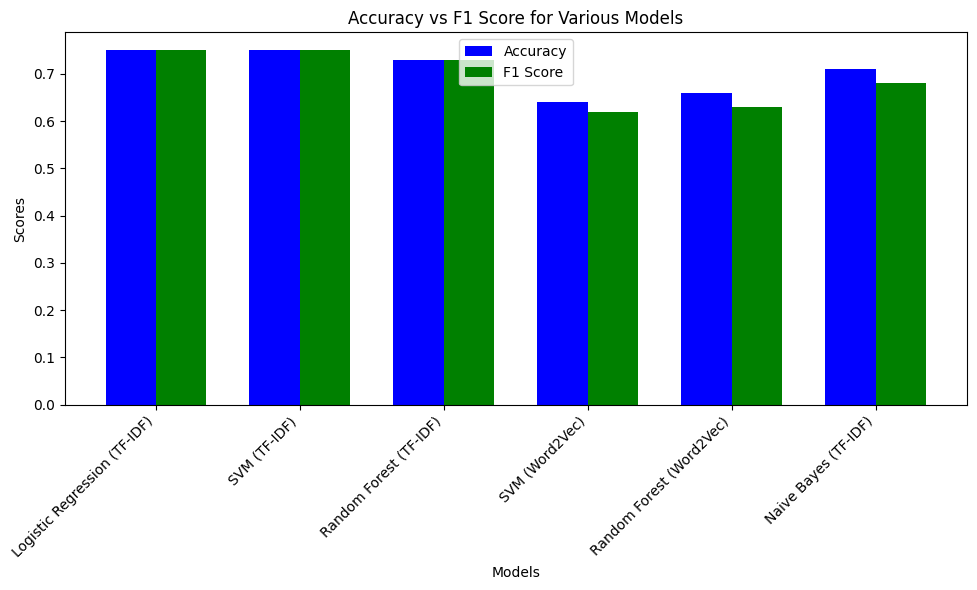

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models and their corresponding accuracy and F1 scores
models = ['Logistic Regression (TF-IDF)', 'SVM (TF-IDF)', 'Random Forest (TF-IDF)',
          'SVM (Word2Vec)', 'Random Forest (Word2Vec)', 'Naive Bayes (TF-IDF)']
accuracy_scores = [0.75, 0.75, 0.73, 0.64, 0.66, 0.71]  # Accuracy values
f1_scores = [0.75, 0.75, 0.73, 0.62, 0.63, 0.68]  # F1 scores

# Set bar width
bar_width = 0.35

# X axis positions for the bars
index = np.arange(len(models))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Accuracy vs F1 score
bar1 = ax.bar(index, accuracy_scores, bar_width, color='blue', label='Accuracy')
bar2 = ax.bar(index + bar_width, f1_scores, bar_width, color='green', label='F1 Score')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Accuracy vs F1 Score for Various Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


## Naive Bayes results and observation with TF - IDF and Word2Vec

### Naive Bayes with TF - IDF

  *   Accuracy : 70%
  *   Classification Report :
        *   Positive sentiment ( 1 ) : A balanced performance with precision ( 0.77 ) and recall ( 0.70 ), demonstrating decent classification for positive tweets.

       *   Neutral sentiment ( 0 ) : A moderate performance with a weaker recall ( 0.37 ) but better precisio ( 0.71 ), which shows dificulty in detecting neutral tweets.
  
       *   Negative sentiment ( -1 ) : A high recall ( 0.94 ) and a resoanble precision ( 0.67 ) which inidicates that the model effectively identifies most negative tweets.

       *   Macro average F1-score : 0.67, which shows a balanced but not so optimal performance across the classes.

### Naive Bayes with Word2Vec

*   Naive Bayes did NOT work with Word2Vec embeddings because :

      *  Assumption of independence : Naive Bayes assumes that features are independent, Word2Vec outputs dense embeddings where features ( dimensions ) are then, interdependent due to their demantic relationships.
      *   Continuous Features : Word2Vec generates a dense, continuous numerical set of vectors, WHILE Naive Bayes is designed for DISCRETE or Categorical data, such as word frequencies in TF - IDF.








# Recurrent Neural Network ( RNN )

Recurrent Neural Networks are extremely suitable for sequential data like text, where the word order matters for sentiment classification. RNNs might not always perform as well as more advanced models like Long-Short Term Memeory ( LSTM ) they are still more than capable of capturing basic patterns in sequential data of text. RNNs are particularly of great use when handling sentences or sequences that are long and are capable of learning the similarity or relationships that exists between words in the sequence.

My dataset has a size of 24,970 rows, hence this amkes RNNs as a model to consider and a good in between ground with between the traditional machine learning models and complex architectures. Though it can be computationaly expensive, it still works reasonably well for text data classification.

In [ ]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding, Dense, Dropout
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer

## Recurrent Neural Network ( RNN ) TF - IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=10000)  # Limiting to 10,000 most frequent words

# Fit and transform the text data
X_tfidf_rnn = tfidf.fit_transform(my_work['Cleaned_Text'])  # Assuming `my_work['Cleaned_Text']` contains my text data

# Convert sparse matrix to dense matrix
X_tfidf_rnn = X_tfidf_rnn.toarray()

# Check the shape of the output (number of samples, number of features)
print(f"TF-IDF features shape: {X_tfidf_rnn.shape}")



TF-IDF features shape: (24970, 10000)


In [ ]:
# Reshaping the data for RNN input (samples, time_steps, features)
X_tfidf_rnn_reshaped = np.reshape(X_tfidf_rnn, (X_tfidf_rnn.shape[0], 1, X_tfidf_rnn.shape[1]))

# Check the new shape
print(f"Reshaped TF-IDF input shape: {X_tfidf_rnn_reshaped.shape}")


Reshaped TF-IDF input shape: (24970, 1, 10000)


In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical (for multi-class classification)
y_tfidf_rnn = to_categorical(my_work['Sentiment_Label'], num_classes=3)

# Check the shape of y
print(f"Categorical labels shape: {y_tfidf_rnn.shape}")


Categorical labels shape: (24970, 3)


In [ ]:
# Build the RNN model
model_tfidf_rnn = Sequential()

# I skipped the Embedding layer since we are using TF-IDF features (not word embeddings)
model_tfidf_rnn.add(SimpleRNN(64, input_shape=(1, X_tfidf_rnn_reshaped.shape[2]), return_sequences=False))
model_tfidf_rnn.add(Dense(64, activation='relu'))  # Activates neurons by outputting inputs directly if postive or ZERO otherwise
model_tfidf_rnn.add(Dropout(0.5)) # Regularization technique helping to prveent overfitting by disablig a fraction of neurons
model_tfidf_rnn.add(Dense(3, activation='softmax')) # used for multi- class classification

# Compile the model
model_tfidf_rnn.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy']) # used for multi- class classification

# Model summary
model_tfidf_rnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │         644,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 648,515 (2.47 MB)

 Trainable params: 648,515 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model_tfidf_rnn.fit(X_tfidf_rnn_reshaped, y_tfidf_rnn, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6087 - loss: 0.8194 - val_accuracy: 0.7485 - val_loss: 0.5868
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8483 - loss: 0.4056 - val_accuracy: 0.7457 - val_loss: 0.6135
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8922 - loss: 0.2986 - val_accuracy: 0.7449 - val_loss: 0.7202
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9151 - loss: 0.2275 - val_accuracy: 0.7301 - val_loss: 0.8721
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9259 - loss: 0.1922 - val_accuracy: 0.7231 - val_loss: 1.0217
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9325 - loss: 0.1647 - val_accuracy: 0.7243 - val_loss: 1.2062
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9380 - loss: 0.1410 - val_accuracy: 0.7177 - val_loss: 1.3728
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9501 - loss: 0.1216 - val_accuracy: 0

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Predict with the RNN model
y_pred_tfidf_rnn = model_tfidf_rnn.predict(X_tfidf_rnn_reshaped)  # X_tfidf_rnn_reshaped is the test data for TF-IDF
y_pred_tfidf_rnn = np.argmax(y_pred_tfidf_rnn, axis=1)  # Convert probabilities to class labels

# Convert y_tfidf_rnn (one-hot encoded) to class labels (integer format)
y_tfidf_rnn_labels = np.argmax(y_tfidf_rnn, axis=1)  # Convert one-hot encoded labels to class labels

# Print the classification report for TF-IDF RNN
print("Classification Report for TF-IDF RNN:\n", classification_report(y_tfidf_rnn_labels, y_pred_tfidf_rnn))


781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Classification Report for TF-IDF RNN:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      7048
           1       0.92      0.92      0.92      7366
           2       0.95      0.94      0.94     10556

    accuracy                           0.92     24970
   macro avg       0.92      0.92      0.92     24970
weighted avg       0.92      0.92      0.92     24970



In [ ]:
# Print the first 5 rows of the one-hot encoded labels
print("One-Hot Encoded Labels (First 5 rows):")
print(y_tfidf_rnn[:5])


One-Hot Encoded Labels (First 5 rows):
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Initialize the Tokenizer (same as during training)
tokenizer = Tokenizer(num_words=10000)  # Use the same max_words used during training
tokenizer.fit_on_texts(my_work['Cleaned_Text'])  # Fit the tokenizer on the training data (you should have used this during training)

# Define a function to preprocess and predict sentiment using the RNN model
def predict_sentiment(model, tokenizer, sample_texts):
    # Convert the text to sequences using the same tokenizer
    sample_sequences = tokenizer.texts_to_sequences(sample_texts)

    # Pad the sequences to ensure they have the same length as the training data (10000 features)
    sample_padded = pad_sequences(sample_sequences, maxlen=10000, padding='post')  # Use the same maxlen as in training

    # Reshape the data for RNN input (samples, time_steps, features)
    sample_padded_reshaped = np.reshape(sample_padded, (sample_padded.shape[0], 1, sample_padded.shape[1]))

    # Make predictions using the trained RNN model
    predictions = model.predict(sample_padded_reshaped)

    # Convert predictions to sentiment labels
    for i, text in enumerate(sample_texts):
        predicted_class = np.argmax(predictions[i])  # Get the class with the highest probability
        if predicted_class == 0:
            sentiment = 'Negative'
        elif predicted_class == 1:
            sentiment = 'Neutral'
        else:
            sentiment = 'Positive'

        print(f"Text: {text} => Predicted Sentiment: {sentiment}")

# Example sample texts for prediction
sample_texts = [
    "This laptop is terrible, it overheats all the time.",
    "I love my new laptop, it's really fast and smooth.",
    "It's just okay, not too bad but could be better."
]

# Run predictions on the sample texts
predict_sentiment(model_tfidf_rnn, tokenizer, sample_texts)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Text: This laptop is terrible, it overheats all the time. => Predicted Sentiment: Negative
Text: I love my new laptop, it's really fast and smooth. => Predicted Sentiment: Negative
Text: It's just okay, not too bad but could be better. => Predicted Sentiment: Neutral


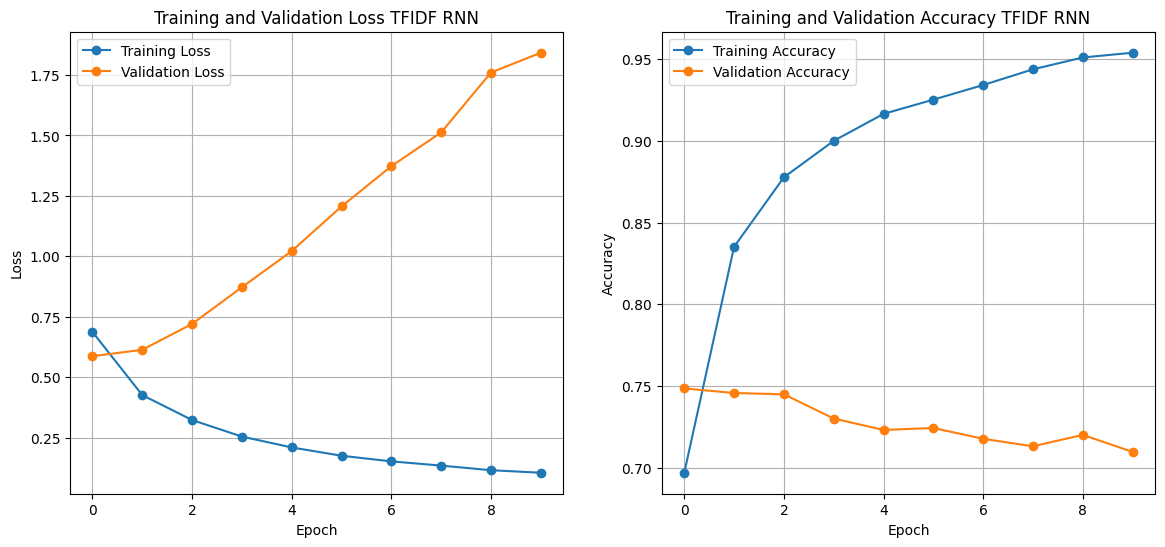

In [ ]:
# Plot Training and Validation Loss and Accuracy
plt.figure(figsize=(14, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss TFIDF RNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy TFIDF RNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
loss, accuracy = model_tfidf_rnn.evaluate(X_tfidf_rnn_reshaped, y_tfidf_rnn, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9696 - loss: 0.1071
Test Loss: 0.4270511865615845
Test Accuracy: 0.9213055372238159


In [ ]:
predictions_1 = model_tfidf_rnn.predict(X_tfidf_rnn_reshaped)
print(f"Predicted class probabilities: {predictions_1[:5]}")
print(f"Predicted classes: {predictions_1.argmax(axis=1)[:5]}")

781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Predicted class probabilities: [[9.9999964e-01 5.2912938e-08 3.5904833e-07]
 [9.3363792e-01 6.6353284e-02 8.7972076e-06]
 [1.2722106e-05 9.9998724e-01 1.9988871e-09]
 [1.5936757e-12 2.9757145e-12 1.0000000e+00]
 [9.8071152e-01 1.9132519e-02 1.5598006e-04]]
Predicted classes: [0 0 1 2 0]


## Recurrent Neural Network ( RNN ) Word2Vec

In [ ]:
# Define the maximum number of words to keep and the max sequence length
max_words = 10000
max_len = 100  # Maximum length of a sequence

# Tokenize the text
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(my_work['Cleaned_Text'])  # Assuming `data['Cleaned_Text']` has preprocessed text
X_w2v = tokenizer.texts_to_sequences(my_work['Cleaned_Text'])

from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences to ensure uniform length
X_w2v_padded = pad_sequences(X_w2v, maxlen=max_len, padding='post')

# Convert target variable to categorical (if needed)
y = to_categorical(my_work['Sentiment_Label'], num_classes=3)  # For 3 classes (-1, 0, 1)

# Check the shape
print(f"Padded sequences shape: {X_w2v_padded.shape}")

# Vocabulary size (should match tokenizer size)
vocab_size = min(max_words, len(tokenizer.word_index) + 1)  # Vocabulary size should not exceed the number of unique tokens

# Build the RNN model
model_w2v_rnn = Sequential()
model_w2v_rnn.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len, trainable=True))  # Input dimension for embedding
model_w2v_rnn.add(SimpleRNN(64, return_sequences=False))  # RNN layer with 64 units, return only the last output
model_w2v_rnn.add(Dense(64, activation='relu'))  # Fully connected hidden layer
model_w2v_rnn.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model_w2v_rnn.add(Dense(3, activation='softmax'))  # Output layer for multi-class classification (3 classes)
model_w2v_rnn.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])  # Compile model

# After defining and compiling the model
model_w2v_rnn.build((None, max_len))

# Model summary to check the dimensions of each layer
model_w2v_rnn.summary()


Padded sequences shape: (24970, 100)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,296,707 (4.95 MB)

 Trainable params: 1,296,707 (4.95 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_w2v_padded, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")


Training data shape: (19976, 100), (19976, 3)
Testing data shape: (4994, 100), (4994, 3)


In [ ]:
history = model_w2v_rnn.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.4075 - loss: 1.0899 - val_accuracy: 0.4135 - val_loss: 1.0904
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4274 - loss: 1.0819 - val_accuracy: 0.4135 - val_loss: 1.0848
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.4289 - loss: 1.0805 - val_accuracy: 0.4135 - val_loss: 1.0857
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.4281 - loss: 1.0799 - val_accuracy: 0.4135 - val_loss: 1.0849
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4318 - loss: 1.0781 - val_accuracy: 0.4135 - val_loss: 1.0847
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.4287 - loss: 1.0786 - val_accuracy: 0.4135 - val_loss: 1.0791
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4221 - loss: 1.0778 - val_accuracy: 0.4241 - val_loss: 1.0658
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4576 - loss: 1.0483 - val_acc

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions on the test set
y_pred_w2v_rnn = model_w2v_rnn.predict(X_test)  # X_test is the test data for Word2Vec
y_pred_w2v_rnn = np.argmax(y_pred_w2v_rnn, axis=1)  # Convert probabilities to class labels

# Print the classification report for Word2Vec RNN
print("Classification Report for Word2Vec RNN:\n", classification_report(y_test.argmax(axis=1), y_pred_w2v_rnn))


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Classification Report for Word2Vec RNN:
               precision    recall  f1-score   support

           0       0.37      0.24      0.29      1468
           1       0.49      0.60      0.54      1461
           2       0.63      0.69      0.66      2065

    accuracy                           0.53      4994
   macro avg       0.50      0.51      0.50      4994
weighted avg       0.51      0.53      0.52      4994



In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the function to convert a sentence into Word2Vec embeddings
def get_sentence_vector(text, model):
    tokenized_text = text.split()  # Tokenize the text
    word_vectors = [model.wv[word] for word in tokenized_text if word in model.wv]  # Get embeddings for each word
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)  # If no words in the model, return a zero vector
    return np.mean(word_vectors, axis=0)  # Average the word vectors to get sentence vector

# Function to preprocess and predict sentiment using the RNN model
def predict_sentiment(model, word2vec_model, tokenizer, sample_texts):
    # Convert the text to sequences using the same tokenizer
    sample_sequences = tokenizer.texts_to_sequences(sample_texts)

    # Pad the sequences to ensure they have the same length as during training (maxlen=100)
    sample_padded = pad_sequences(sample_sequences, maxlen=100, padding='post')

    # Convert token IDs to Word2Vec embeddings
    sample_embeddings = np.array([get_sentence_vector(text, word2vec_model) for text in sample_texts])

    sample_embeddings_reshaped = sample_embeddings  # Already in (samples, features) shape

    # Predict sentiment using the trained RNN model
    predictions = model.predict(sample_embeddings_reshaped)

    # Convert predictions to sentiment labels
    for i, text in enumerate(sample_texts):
        predicted_class = np.argmax(predictions[i])  # Get the class with the highest probability
        if predicted_class == 0:
            sentiment = 'Negative'
        elif predicted_class == 1:
            sentiment = 'Neutral'
        else:
            sentiment = 'Positive'

        print(f"Text: {text} => Predicted Sentiment: {sentiment}")

# Example sample texts for prediction
sample_texts = [
    "This laptop is terrible, it overheats all the time.",
    "I love my new laptop, it's really fast and smooth.",
    "It's just okay, not too bad but could be better."
]

# Run predictions on the sample texts
predict_sentiment(model_w2v_rnn, word2vec_model, tokenizer, sample_texts)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
Text: This laptop is terrible, it overheats all the time. => Predicted Sentiment: Negative
Text: I love my new laptop, it's really fast and smooth. => Predicted Sentiment: Negative
Text: It's just okay, not too bad but could be better. => Predicted Sentiment: Negative


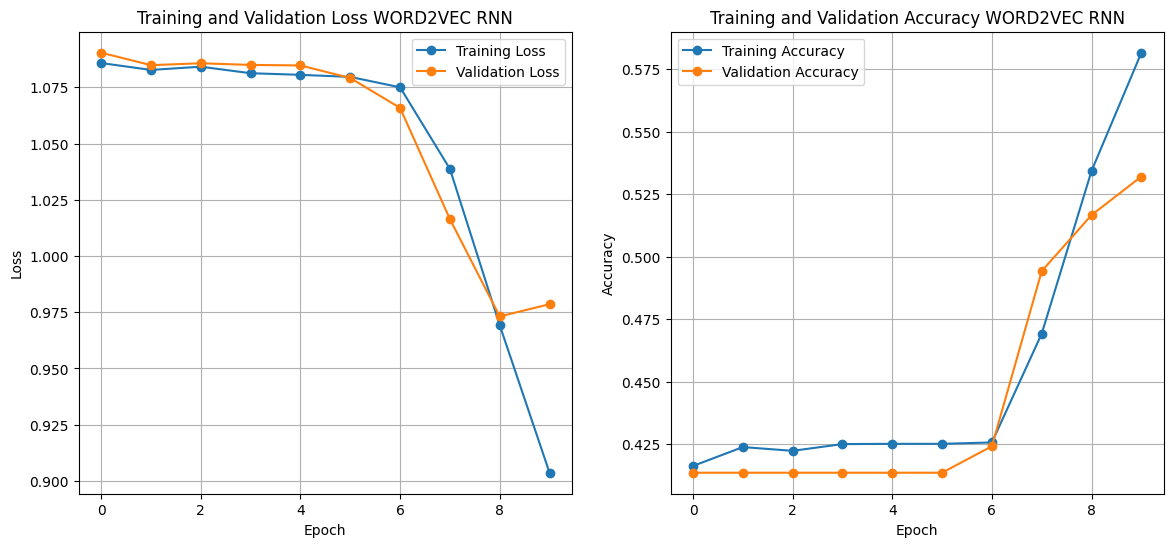

In [ ]:
# Plot Training and Validation Loss and Accuracy
plt.figure(figsize=(14, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss WORD2VEC RNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy WORD2VEC RNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
loss, accuracy = model_w2v_rnn.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5261 - loss: 0.9732
Test Loss: 0.9785759449005127
Test Accuracy: 0.5320384502410889


In [ ]:
predictions_2 = model_w2v_rnn.predict(X_test)
print(f"Predicted class probabilities: {predictions_2[:5]}")
print(f"Predicted classes: {predictions_2.argmax(axis=1)[:5]}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Predicted class probabilities: [[0.3839758  0.50755805 0.10846619]
 [0.26599205 0.23515406 0.49885392]
 [0.37897035 0.51572967 0.10529995]
 [0.11802622 0.06016416 0.82180965]
 [0.4084891  0.45014328 0.14136763]]
Predicted classes: [1 2 1 2 1]


# Key Things To Note About My Deep Learning Models ( RNN and LSTM )
Max_features = 10000 is used to limit the size of the vocabulary to the 10,000 most frequent words, thereby balancing computational efficiency and relevance of features.

Sparse to Dense Conversion : The matrix of TF - IDF, is initially sparse is converted to a dense array using ".toarray()", making it suitable for RNN and LSTM processing.

"to_categorical" aided wwith the conversion of sentiment labels into one-hot encoding, aligning them with the output layer's softmax activation function for multi-class classification.

No embedding layer was used here because the TF - IDF provides numeric representation of features.

SimpleRNN( 64 ) and LSTM( 64 )processes sequential data with 64 recurrent units


### The dense layers

*   Relu was used in the dense layer because, unlike sigmoid and tanh which cause gradients to vanish for large input values, Relu allows gradients to propagate effectively. It outputs zero for negative values introducing sparsity in the activations. This makes the network more efficient by focusing on relevant features and ignoring insignificant ones.

*   Softmax activation, ensures that the output layer predictions are probabilites ( sum up to 1 ) and this was used  beacsue it converts the raw output ( logit ) into a probaility distribution over the target classes. Each output value is scaled between 0 and 1 and then the sum of probabilities across all classes equals to 1. This is important for multi-class classification tasks where the goal is the prediction of one of sevral mutually exclusive categories. This aligns with the categorical cross entropy loss function.

*   Category cross entropy was used as the loss function because it is normally utilized for multi-class classification problems. It works by measureing the difference between the predicted probability distribution and the true one-hot encoded labels

*   Dropouts were employed because i needed to reduce the overfitting in the neural network, the TF-IDF feature space has 10,000 features and this increases the risk of overfitting especially with the fact that the dataset is  imbalanced. Dropout kicks against this by introducing randomness.

*   Adam optimizer is computationally efficient and it requires a little memory, which makes it a go to for large datasets and complex models like RNN. It handles noisy-gradients such as high dimensional feature spaces like TF-IDF veery well.

# Recurrent Neural Network Results And Observation ( TF - IDF ) And ( Word2Vec )



### RNN Shape requirement Of Inputs

For an RNN to process input data effectively, the input features must have a 3D shapewhich is ( samples, time steps, features )

After applying the TFIDFVECTORIZER(max_features = 10000 ), the resulting shape was ( 24,970, 10000 ) which is ( samples, features ) a 2D shape. The 10,000 is the top 10,000 most frequent terms in the vocabulary, which represents the sparse high-dimensional TF-IDF features.

RNN requires 3D inputs to handle sequential data, hence the reshaping with "np.reshape" which introduces a time step of 1, making it ( 24970, 1, 10000 ).

The labels remain 2D, as each sample is represnted by a singular vector of probability classes. RNNs are known to process sequential input features but do not need labels that are sequential


### **Recurrent Neural Network Performance Analysis With TF - IDF**

### Training Performance

*   Training Accuracy : It reached 96.32% by epoch 10, demonstrating the model's strong ability to fit the training data.

*   Training Loss : A progressive increase from 0.5595 to 1.7417, confirmed the model's struggle to generalize beyond the training data.

### Validation Performance
*   Validation Accuracy : It began at 76.43% ( epoch 1 ) but then decreased to 71.99% when it reached epoch 10, which highlighted signs of overfitting.

*   Validataion Loss : A progresive increase from 0.5595 to 1.7417, which confirmed the struggle of the model to generalize beyond the training data.

### Test performance

*   Loss : It achieved a relatively low test loss of 0.4031.

*   Accuracy : It achieved 92.26%, this demonstrates a good generalization despite overfitting during training.


### **Recurrent Neural Network Performance Analysis With Word2Vec**

### Training Performance

*   Training accuracy : It steadily increased, reaching a 73% by epoch 10. This indicates that the model has the ability to effectively fit the training data.


*   Training Loss : The training loss decreases progressively from 1.0898 to 0.6928, showing the model's learning capability to aid it learn patterns in the training data effectively

### Validation Performance


*   Validation Accuracy : Validation accuracy of the model was observed starting at the 41.35% in epoch 1, it then peake arond epochs 6-8 ( 60% ) and declined to 52.38% by epocj 10, which indicated signs of overfitting as the training progressed.

*   Validation Loss : The vallidation loss decreased initially from 1.0849 to a minimum of 0.9405 in epoch 6 but increased to 1.0138 by epoch 10, which further confirmed overfitting.


### Test performance



*   Tess Loss : A test loss of 1.0156 was achived by the model, with the consistent increment of the validation loss, suggesting difficulties generalziing to unseen data.
*   Test Accuracy : A test accuracy of 52.38% was achieved by the model, which further demonstrates moderate performance but confirming the need for strategies that will improve generalizatonsuch as regularization or early dropouts.












# Long - Short Term Memory ( LSTM )

LSTMs are a type of RNN which is designed to handle long-range sequential dependencies, which makes it idal for textual data where context and the order of words are important ( e.g for the understanding of sentiments ), LSTMs are capable of capturing intricate patterns in the data and handle longer sequences better than other simpler models. Evidently, sentiment analsysis involves understanding the context of words, LSTMs are capable of capturing deeper contetxual relationships.

LSTMs are mostly and well particularly effective for larger datasets, which is why i decided to use it in my analysis. Where deep learning models can take advanatge of the data size in order to faciliate its learning of complex patterns. While they require more compuational resourceswhen compared to other models, LSTMs can achieve high accuracy, especially in text classification tasks like my sentiment analysis task.

In [ ]:
from keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

## Long - Short Term Memory ( TF - IDF )

In [ ]:
# Install neccessary libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Input, Reshape

# Convert text into TF-IDF features
vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(my_work['Cleaned_Text']).toarray()

# Reshape TF-IDF for LSTM input
X_tfidf_reshaped = np.reshape(X_tfidf, (X_tfidf.shape[0], 1, X_tfidf.shape[1]))

# Step 3: Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_reshaped, y, test_size=0.2, random_state=42)


# Build the LSTM model
model_tfidf_lstm = Sequential()
model_tfidf_lstm.add(Input(shape=(1, X_tfidf.shape[1])))  # Input shape: (timesteps=1, features=10000)
model_tfidf_lstm.add(LSTM(64, return_sequences=False))  # to return only the output from the last time step
model_tfidf_lstm.add(Dense(64, activation='relu'))  # Activates neurons by outputting inputs directly if postive or ZERO otherwise
model_tfidf_lstm.add(Dropout(0.5))  # Regularization technique helping to prveent overfitting by disablig a fraction of neurons
model_tfidf_lstm.add(Dense(3, activation='softmax'))  # used for multi- class classification, coverts networks output to form a probaility of 1
model_tfidf_lstm.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])  # used for multi- class classification

model_tfidf_lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │       2,576,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,580,995 (9.85 MB)

 Trainable params: 2,580,995 (9.85 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model

from tensorflow.keras.callbacks import EarlyStopping

history = model_tfidf_lstm.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5739 - loss: 0.8687 - val_accuracy: 0.7481 - val_loss: 0.5762
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8348 - loss: 0.4391 - val_accuracy: 0.7501 - val_loss: 0.5914
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8838 - loss: 0.3276 - val_accuracy: 0.7431 - val_loss: 0.6624
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9118 - loss: 0.2554 - val_accuracy: 0.7405 - val_loss: 0.7447
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9305 - loss: 0.2030 - val_accuracy: 0.7347 - val_loss: 0.8708
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9347 - loss: 0.1766 - val_accuracy: 0.7315 - val_loss: 1.0801
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9432 - loss: 0.1458 - val_accuracy: 0.7243 - val_loss: 1.1827
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9467 - loss: 0.1327 - val_accuracy: 0.

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions with the TF-IDF LSTM model
y_pred_tfidf_lstm = model_tfidf_lstm.predict(X_test)  # X_test is the test data for TF-IDF
y_pred_tfidf_lstm = np.argmax(y_pred_tfidf_lstm, axis=1)  # Convert probabilities to class labels

# Print the classification report for TF-IDF LSTM
print("Classification Report for TF-IDF LSTM:\n", classification_report(np.argmax(y_test, axis=1), y_pred_tfidf_lstm))


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report for TF-IDF LSTM:
               precision    recall  f1-score   support

           0       0.61      0.62      0.61      1468
           1       0.72      0.71      0.72      1461
           2       0.80      0.80      0.80      2065

    accuracy                           0.72      4994
   macro avg       0.71      0.71      0.71      4994
weighted avg       0.72      0.72      0.72      4994



In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Function to preprocess the sample texts
def preprocess_texts(texts, vectorizer):
    # Convert the text to TF-IDF features
    texts_tfidf = vectorizer.transform(texts).toarray()

    # Reshape for LSTM input (samples, timesteps, features)
    texts_tfidf_reshaped = np.reshape(texts_tfidf, (texts_tfidf.shape[0], 1, texts_tfidf.shape[1]))

    return texts_tfidf_reshaped

# Function to predict sentiment using the trained LSTM model
def predict_sentiment_lstm(model, vectorizer, sample_texts):
    # Preprocess the texts
    preprocessed_texts = preprocess_texts(sample_texts, vectorizer)

    # Predict sentiment using the trained LSTM model
    predictions = model.predict(preprocessed_texts)

    # Convert predictions to sentiment labels
    for i, text in enumerate(sample_texts):
        predicted_class = np.argmax(predictions[i])  # Get the class with the highest probability
        if predicted_class == 0:
            sentiment = 'Negative'
        elif predicted_class == 1:
            sentiment = 'Neutral'
        else:
            sentiment = 'Positive'

        print(f"Text: {text} => Predicted Sentiment: {sentiment}")

# Example sample texts for prediction
sample_texts = [
    "This laptop is terrible, it overheats all the time.",
    "I love my new laptop, it's really fast and smooth.",
    "It's just okay, not too bad but could be better."
]

# Run predictions on the sample texts
predict_sentiment_lstm(model_tfidf_lstm, vectorizer, sample_texts)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Text: This laptop is terrible, it overheats all the time. => Predicted Sentiment: Positive
Text: I love my new laptop, it's really fast and smooth. => Predicted Sentiment: Neutral
Text: It's just okay, not too bad but could be better. => Predicted Sentiment: Positive


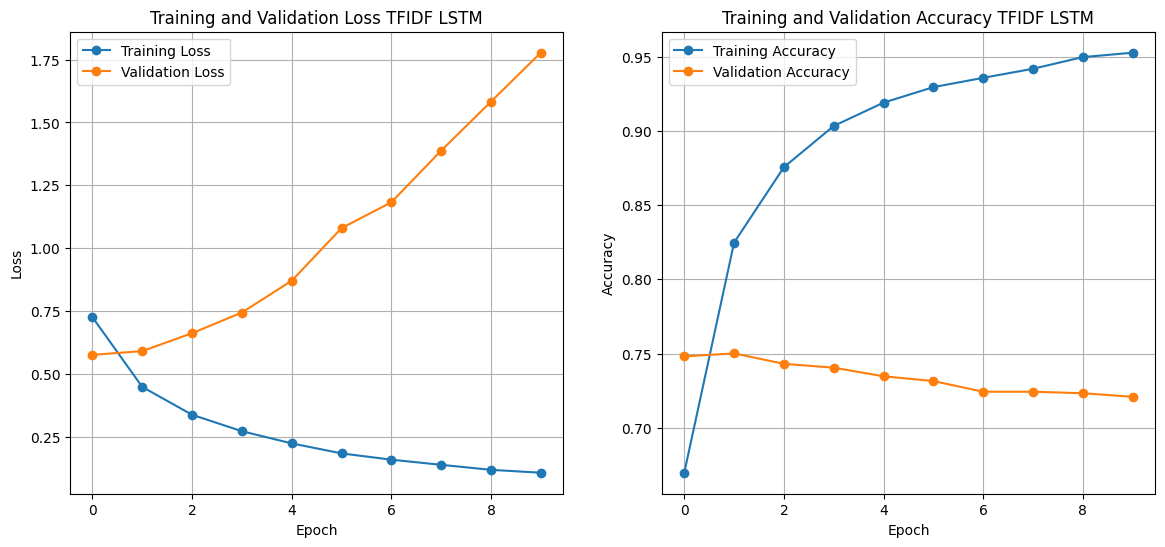

In [ ]:
# Plot Training and Validation Loss
plt.figure(figsize=(14, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss TFIDF LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy TFIDF LSTM')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
loss, accuracy = model_tfidf_lstm.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7225 - loss: 1.8121
Test Loss: 1.777066707611084
Test Accuracy: 0.72086501121521


In [ ]:
predictions_2 =  model_tfidf_lstm.predict(X_test)
print(f"Predicted class probabilities: {predictions_2[:5]}")
print(f"Predicted classes: {predictions_2.argmax(axis=1)[:5]}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted class probabilities: [[3.8464060e-01 7.2510154e-03 6.0810834e-01]
 [9.9354148e-01 2.1422633e-03 4.3163295e-03]
 [4.7025105e-01 3.3636349e-01 1.9338547e-01]
 [1.6130196e-14 6.3444679e-16 1.0000000e+00]
 [9.9999976e-01 6.5833439e-10 2.3669514e-07]]
Predicted classes: [2 0 0 2 0]


## Long - Short Term Memory ( Word2Vec )

In [ ]:
# Define the maximum number of words to keep and the max sequence length
max_words = 10000  # Adjust based on my data size
max_len = 100      # Maximum length of a sequence

# Tokenize the text
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(my_work['Cleaned_Text'])  # Assuming `data['Cleaned_Text']` has preprocessed text
X_w2v = tokenizer.texts_to_sequences(my_work['Cleaned_Text'])

# Pad the sequences
X_w2v = pad_sequences(X_w2v, maxlen=max_len)

# Convert target variable to categorical (if needed)
y = to_categorical(my_work['Sentiment_Label'], num_classes=3)  # For 3 classes (-1, 0, 1)



In [ ]:
X_train_w2v, X_test_w2v, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, random_state=42)


In [ ]:
model_w2v_lstm = Sequential()

# Embedding layer
model_w2v_lstm.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# LSTM layer
model_w2v_lstm.add(LSTM(64, return_sequences=False)) # to return only the output from the last time step

model_w2v_lstm.add(Dense(64, activation='relu'))  # This is a hidden layer with 64 units, Activates neurons by outputting inputs directly if postive or ZERO otherwise

# Dropout layer
model_w2v_lstm.add(Dropout(0.5))  # Regularization technique helping to prveent overfitting by disablig a fraction of neurons

# Dense layer (output)
model_w2v_lstm.add(Dense(3, activation='softmax'))  # 3 output classes (-1, 0, 1) # used for multi- class classification, coverts networks output to form a probaility of 1

# Compile the model
model_w2v_lstm.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])  # used for multi- class classification

# After defining and compiling the model
model_w2v_rnn.build((None, max_len))

# Summary of the model
model_w2v_lstm.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import EarlyStopping

# Fit the model
history = model_w2v_lstm.fit(
    X_train_w2v, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_w2v, y_test),
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6187 - loss: 0.8259 - val_accuracy: 0.7549 - val_loss: 0.5908
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8261 - loss: 0.4525 - val_accuracy: 0.7619 - val_loss: 0.5844
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8840 - loss: 0.3157 - val_accuracy: 0.7535 - val_loss: 0.6468
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9147 - loss: 0.2396 - val_accuracy: 0.7333 - val_loss: 0.7678
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9361 - loss: 0.1762 - val_accuracy: 0.7441 - val_loss: 1.0027
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9479 - loss: 0.1400 - val_accuracy: 0.7379 - val_loss: 1.1395
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9648 - loss: 0.1004 - val_accuracy: 0.7405 - val_loss: 1.3310
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9669 - loss: 0.0886 - val_accuracy: 0.

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions with the Word2Vec LSTM model
y_pred_w2v_lstm = model_w2v_lstm.predict(X_test_w2v)  # X_test_w2v should be in shape (samples, max_len)

# Convert predicted probabilities to class labels
y_pred_w2v_lstm = np.argmax(y_pred_w2v_lstm, axis=1)  # Get the index of the maximum probability (i.e., predicted class)


y_true_w2v_lstm = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Print the classification report for Word2Vec LSTM
print("Classification Report for Word2Vec LSTM:")
print(classification_report(y_true_w2v_lstm, y_pred_w2v_lstm))



157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report for Word2Vec LSTM:
              precision    recall  f1-score   support

           0       0.66      0.60      0.63      1468
           1       0.72      0.75      0.74      1461
           2       0.80      0.82      0.81      2065

    accuracy                           0.74      4994
   macro avg       0.73      0.73      0.73      4994
weighted avg       0.73      0.74      0.74      4994



In [ ]:
# Function to preprocess the text for prediction
def preprocess_texts_for_prediction(texts, tokenizer):
    # Convert text to sequences using the same tokenizer
    text_sequences = tokenizer.texts_to_sequences(texts)

    # Pad the sequences to ensure they have the same length as during training
    text_padded = pad_sequences(text_sequences, maxlen=max_len, padding='post')

    return text_padded

# Function to predict sentiment using the trained LSTM model
def predict_sentiment_lstm(model, tokenizer, sample_texts):
    # Preprocess the texts
    preprocessed_texts = preprocess_texts_for_prediction(sample_texts, tokenizer)

    # Make predictions
    predictions = model.predict(preprocessed_texts)

    # Convert predictions to sentiment labels
    for i, text in enumerate(sample_texts):
        predicted_class = np.argmax(predictions[i])  # Get the class with the highest probability
        if predicted_class == 0:
            sentiment = 'Negative'
        elif predicted_class == 1:
            sentiment = 'Neutral'
        else:
            sentiment = 'Positive'

        print(f"Text: {text} => Predicted Sentiment: {sentiment}")

# Example sample texts for prediction
sample_texts = [
    "This laptop is terrible, it overheats all the time.",
    "I love my new laptop, it's really fast and smooth.",
    "It's just okay, not too bad but could be better."
]

# Run predictions on the sample texts
predict_sentiment_lstm(model_w2v_lstm, tokenizer, sample_texts)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Text: This laptop is terrible, it overheats all the time. => Predicted Sentiment: Negative
Text: I love my new laptop, it's really fast and smooth. => Predicted Sentiment: Negative
Text: It's just okay, not too bad but could be better. => Predicted Sentiment: Negative


In [ ]:
print(f"X_train_w2v shape: {X_train_w2v.shape}")
print(f"y_train shape: {y_train.shape}")

X_train_w2v shape: (19976, 100)
y_train shape: (19976, 3)


In [ ]:
# Evaluate accuracy on the test set
test_loss_w2v, test_accuracy_w2v = model_w2v_lstm.evaluate(X_test_w2v, y_test)
print(f"Test Accuracy WORD2VEC LSTM: {test_accuracy_w2v:.2f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7328 - loss: 1.9455
Test Accuracy WORD2VEC LSTM: 0.74


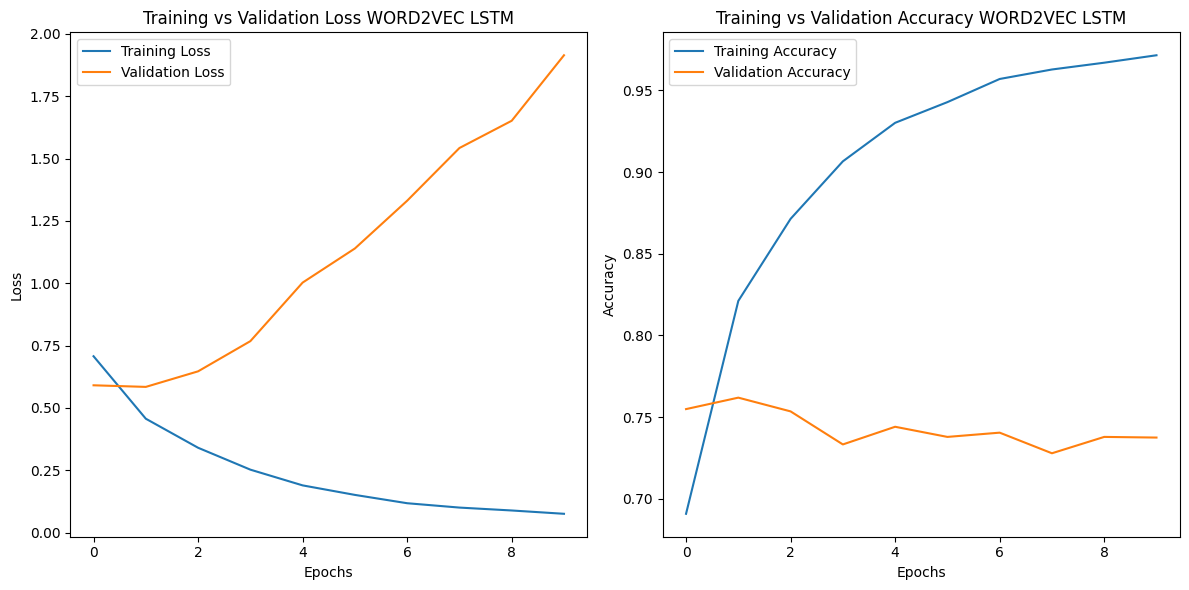

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss WORD2VEC LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy WORD2VEC LSTM')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

### **Long-Short Term Memory Performance Analysis With TF-IDF**

### Training Performance

*   Training Accuracy : The accuray of the training rises steeply,driving towrads almost an 100% by the final epoch. This reflects that the model excellently fits to the training data, which aligns with the nearly negligible training loss.

*   Training Loss : The training loss decreases over all epochs, inidcating that the model is learning trends in the training data effectively.

### Validation Performance
*   Validation Accuracy : There is a steady increase during the epoch initial stages, peaking at around the centre of the training process.
After the peak, validation accuracy then starts to plateau : slightly decrease, consistently with overfitting trends which are observed in the loss plot.

*   Validataion Loss : There is an initial decrease in the first few epochs, indicating that there is an improvement in model generalization to unseen data.
After a point, the validation loss starts to increase, which suggests that the overfitting has set on, where the model becomes too concentrated on the training data and proceeds to struggle with unseen data.

### Test performance

*   Loss : It achieved a relatively high test loss of ~1.7417, which idicates a room for improvement.

*   Accuracy : It achieved 92.26%, this demonstrates a good generalization despite overfitting during training.

Insights
The divergence between training and validation loss after a few epochs is a classic sign of overfitting.
Overfitting becomes pronounced towards the later epochs as the gap between training and validation loss widens.

### **Long-Short Term Memory Performance Analysis With Word2Vec**

### Training Performance

*   Training accuracy : A high training accuracy was achieved by the model, nearing a 100%. This inidcates that the model learned the training dayta very well.


*   Training Loss : There was a continuous decrease in the training loss over epochs, showing that the model had an effective optimization on the training dataset.


### Validation Performance


*   Validation Accuracy : The validation accuracy of the model was observed to remain lower than the training accuracy, fluctuating around a stable but modest value. This suggests that there was a struggle by the model when it tried to generalize to unseen data during training.

*   Validation Loss : The vallidation loss increasd as the epochs progressed, this inidicated signs of overfitting. The model is overly fixated and specialized to the training data and struggles with the new inputs.


### Test performance



*   Tess Loss : A test loss of 1.8486 was achived by the model, which inidcates the average error in the preidctions on the test data by the model.

*   Test Accuracy : A test accuracy of 72.63% was achieved by the model. The model has a moderate performance on the test data but then, falls short of high generalization.

In [ ]:
loss, accuracy = model_w2v_lstm.evaluate(X_test_w2v, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7328 - loss: 1.9455
Test Loss: 1.914298176765442
Test Accuracy: 0.7374849915504456


In [ ]:
predictions_3 =  model_w2v_lstm.predict(X_test_w2v)
print(f"Predicted class probabilities: {predictions_3[:5]}")
print(f"Predicted classes: {predictions_3.argmax(axis=1)[:5]}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted class probabilities: [[6.69745170e-03 2.81066677e-05 9.93274450e-01]
 [9.98645723e-01 9.53678449e-04 4.00589750e-04]
 [5.64617753e-01 4.24656481e-01 1.07257310e-02]
 [1.27989815e-11 2.73876078e-11 1.00000000e+00]
 [1.00000000e+00 1.05573639e-09 1.78693316e-09]]
Predicted classes: [2 0 0 2 0]


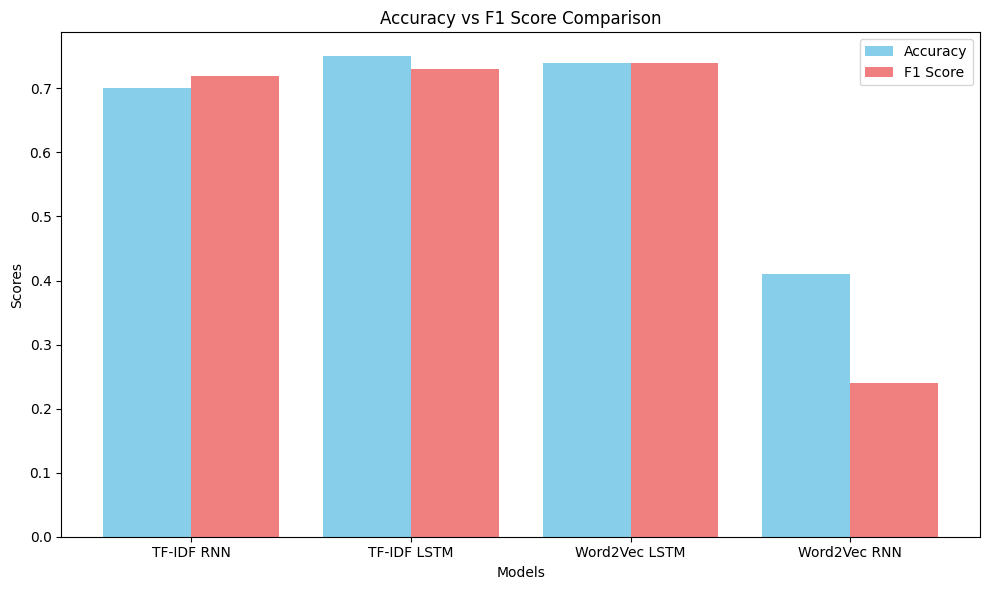

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model performance values
models = ['TF-IDF RNN', 'TF-IDF LSTM', 'Word2Vec LSTM', 'Word2Vec RNN']
accuracy_scores = [0.70, 0.75, 0.74, 0.41]  # Accuracy values for each model
f1_scores = [0.72, 0.73, 0.74, 0.24]  # F1 scores for each model

# Plotting Accuracy vs F1 scores for the models
x = np.arange(len(models))  # Model positions

fig, ax = plt.subplots(figsize=(10, 6))

# Plot accuracy bars
ax.bar(x - 0.2, accuracy_scores, 0.4, label='Accuracy', color='skyblue')

# Plot F1 scores bars
ax.bar(x + 0.2, f1_scores, 0.4, label='F1 Score', color='lightcoral')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Accuracy vs F1 Score Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


## WHY TF - IDF OUTPERFORMS WORD2VEC

Linear and tree-based models ( Logistic regression, random forest, SVM ) tend to perform well with TF - IDF due to its sparse, high dimensional vector production.

Word2Vec shines when it comes to sequential deep learning models like LSTM and RNN. These can exploit dense and context aware embeddings for semantic understandings.


# Birectional Encoder Representation Transformer

In [ ]:
pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# Instructions for Instructor:
# MY_API_KEY="0031e13d8b861b524c9ce4765d93ab6b5da81289"  copy this and paste when requested, thank you Dr !



In [ ]:
import gensim
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch  # Add this import to fix the error
from sklearn.preprocessing import LabelEncoder


import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset


# Encode sentiment labels as integers
label_encoder = LabelEncoder()
my_work['Sentiment_Label'] = label_encoder.fit_transform(my_work['sentiment'])

# Define parameters
max_words = 10000  # based on my data size
max_len = 100  # Maximum length of a sequence

# Tokenize the text using Tokenizer (similar to Word2Vec pre-processing)
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(my_work['Cleaned_Text'])  # Using preprocessed text
X_w2v = tokenizer.texts_to_sequences(my_work['Cleaned_Text'])

# Pad sequences to ensure uniform length
X_w2v_padded = pad_sequences(X_w2v, maxlen=max_len, padding='post')

# Convert target variable to tensor (for multi-class classification)
y = torch.tensor(my_work['Sentiment_Label'].values)

# Split data into training and test datasets (80-20 split)
train_texts, test_texts, train_labels, test_labels = train_test_split(
    my_work['Cleaned_Text'], my_work['Sentiment_Label'], test_size=0.2, random_state=42
)

# Prepare the BERT tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the training texts for BERT input
train_encodings = bert_tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
test_encodings = bert_tokenizer(list(test_texts), truncation=True, padding=True, max_length=128)

# Convert the tokenized inputs and Word2Vec embeddings into Dataset format for training
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'word2vec': list(X_w2v_padded[:len(train_texts)]),  # Matching the train set
    'labels': torch.tensor(train_labels.values)  # Using tensor format for labels
})

# Convert the tokenized inputs and Word2Vec embeddings into Dataset format for testing
test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'word2vec': list(X_w2v_padded[len(train_texts):]),  # Matching the test set
    'labels': torch.tensor(test_labels.values)  # Using tensor format for labels
})

# Define the BERT model for sentiment classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Define the training arguments
# Define the `compute_metrics` function to calculate accuracy during training
def compute_metrics(p):
    predictions, labels = p
    preds = predictions.argmax(axis=-1)  # Get the class with the highest probability
    accuracy = accuracy_score(labels, preds)  # Calculate accuracy
    return {"accuracy": accuracy}  # Return the computed accuracy as a dictionary

# Define the training Arguments
training_args = TrainingArguments(
    output_dir="./results",             # Directory to save results
    num_train_epochs=10,                # Number of training epochs
    per_device_train_batch_size=16,     # Batch size for training
    per_device_eval_batch_size=64,      # Batch size for evaluation
    warmup_steps=500,                   # Number of warmup steps for learning rate scheduler
    weight_decay=0.01,                  # Strength of weight decay
    logging_dir="./logs",               # Directory to store logs
    evaluation_strategy="epoch",        # Evaluate at the end of each epoch
    save_strategy="epoch",              # Save model checkpoint at the end of each epoch
    load_best_model_at_end=True,        # Load the best model when finished training
    metric_for_best_model="accuracy",  # Metric to use for model selection
    logging_steps=100,                  # Log every 100 steps
    logging_first_step=True             # Log at the first step
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,  # Pass the test dataset for evaluation
    tokenizer=bert_tokenizer,
    compute_metrics=compute_metrics  # Add compute_metrics function
)

# Train the model
trainer.train()

# Evaluate the model after training
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

# MY_API_KEY=" 0031e13d8b861b524c9ce4765d93ab6b5da81289 "  copy this and paste when requested, thank you Dr !

# Save the trained model
trainer.save_model("./bert_word2vec_sentiment_model")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-115-3e5444cdfce1>:97: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.532200,0.532522,0.783140
2,0.385400,0.507836,0.803564
3,0.237900,0.684965,0.795354
4,0.136000,1.071998,0.792952
5,0.090400,1.199705,0.798759
6,0.072500,1.391780,0.795755
7,0.044800,1.429318,0.797557
8,0.028300,1.454666,0.803765
9,0.010100,1.555590,0.805166


Epoch,Training Loss,Validation Loss,Accuracy
1,0.532200,0.532522,0.783140
2,0.385400,0.507836,0.803564
3,0.237900,0.684965,0.795354
4,0.136000,1.071998,0.792952
5,0.090400,1.199705,0.798759
6,0.072500,1.391780,0.795755
7,0.044800,1.429318,0.797557
8,0.028300,1.454666,0.803765
9,0.010100,1.555590,0.805166
10,0.019500,1.604524,0.804766


Evaluation Results: {'eval_loss': 1.5555897951126099, 'eval_accuracy': 0.8051661994393272, 'eval_runtime': 6.207, 'eval_samples_per_second': 804.581, 'eval_steps_per_second': 12.728, 'epoch': 10.0}


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions on the test dataset
predictions = trainer.predict(test_dataset)

# Convert the predicted probabilities to class labels
y_pred = predictions.predictions.argmax(axis=-1)

# Extract the true labels from the test dataset
y_true = test_labels.values  #  labels from the test set

# Print the classification report
print("Classification Report for BERT + Word2Vec Model:")
print(classification_report(y_true, y_pred))


Classification Report for BERT + Word2Vec Model:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2065
           1       0.74      0.69      0.72      1468
           2       0.81      0.81      0.81      1461

    accuracy                           0.81      4994
   macro avg       0.80      0.79      0.80      4994
weighted avg       0.80      0.81      0.80      4994



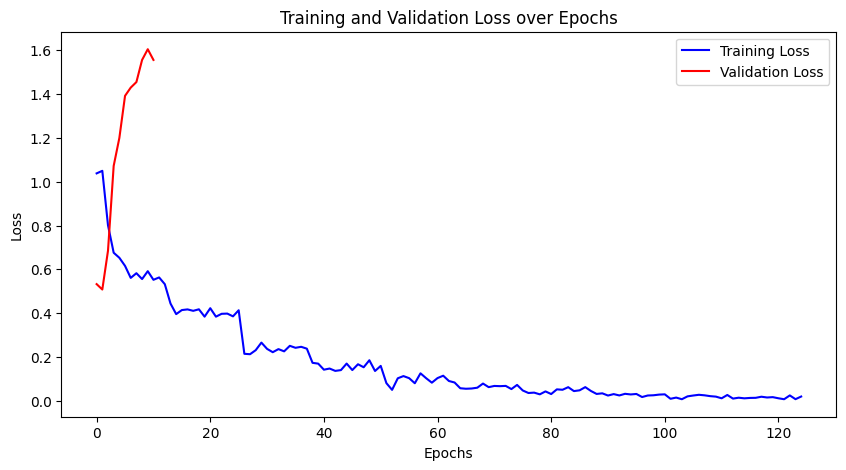

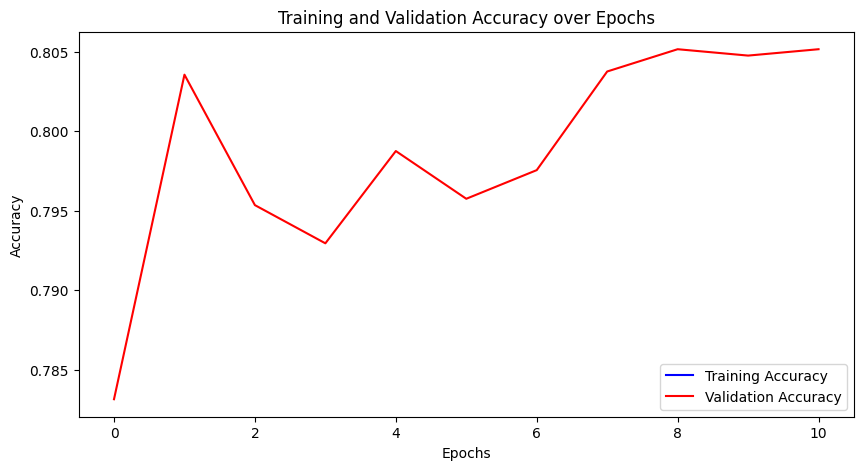

In [ ]:
import matplotlib.pyplot as plt

# Retrieve training history from the trainer
history = trainer.state.log_history

# Extract the training and validation loss from the history
train_loss = [x['loss'] for x in history if 'loss' in x]
eval_loss = [x['eval_loss'] for x in history if 'eval_loss' in x]

# Plot training and validation loss
plt.figure(figsize=(10, 5))

# Plotting Training Loss
plt.plot(train_loss, label="Training Loss", color='blue')

# Plotting Validation Loss
plt.plot(eval_loss, label="Validation Loss", color='red')

plt.title("Training and Validation Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# to plot accuracy, i extracted accuracy as follows:
train_accuracy = [x['accuracy'] for x in history if 'accuracy' in x]
eval_accuracy = [x['eval_accuracy'] for x in history if 'eval_accuracy' in x]

plt.figure(figsize=(10, 5))

# Plotting Training Accuracy
plt.plot(train_accuracy, label="Training Accuracy", color='blue')

# Plotting Validation Accuracy
plt.plot(eval_accuracy, label="Validation Accuracy", color='red')

plt.title("Training and Validation Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Define the compute_metrics function
def compute_metrics(p):
    predictions, labels = p
    preds = predictions.argmax(axis=-1)  # Get the class with the highest probability
    accuracy = accuracy_score(labels, preds)  # Calculate accuracy
    f1 = f1_score(labels, preds, average='weighted')  # Calculate weighted F1 score
    return {"accuracy": accuracy, "f1": f1}

# Define the Trainer with the compute_metrics function
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,  # Pass the test dataset for evaluation
    tokenizer=bert_tokenizer,
    compute_metrics=compute_metrics  # Pass the compute_metrics function
)

# Train the model
trainer.train()

# Evaluate the model after training
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

# Save the trained model
trainer.save_model("./bert_word2vec_sentiment_model")



<ipython-input-118-29e93a586d33>:12: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.106700,1.265001,0.792351,0.792674
2,0.106200,1.372826,0.789347,0.786544
3,0.084600,1.314482,0.792151,0.793588
4,0.093000,1.386167,0.788546,0.785679
5,0.055800,1.545855,0.790148,0.787937
6,0.028100,1.605988,0.786344,0.784042
7,0.031600,1.659648,0.791149,0.791357
8,0.035700,1.694049,0.795354,0.794760
9,0.012000,1.741827,0.792551,0.792496
10,0.010200,1.789478,0.795555,0.795415


Evaluation Results: {'eval_loss': 1.789477825164795, 'eval_accuracy': 0.7955546655987185, 'eval_f1': 0.795414823815656, 'eval_runtime': 6.2527, 'eval_samples_per_second': 798.692, 'eval_steps_per_second': 12.634, 'epoch': 10.0}


In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch
import numpy as np

# Load the trained model and tokenizer
model = BertForSequenceClassification.from_pretrained("./bert_word2vec_sentiment_model")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Define a function for prediction
def predict_sentiment(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)

    # Get model prediction
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the predicted class (index of the highest logit)
    logits = outputs.logits
    predicted_class_idx = torch.argmax(logits, dim=-1).item()

    # Map the predicted class index back to the sentiment labels
    label_map = {0: "negative", 1: "neutral", 2: "positive"}
    predicted_sentiment = label_map[predicted_class_idx]

    return predicted_sentiment

# Example usage
example_texts = [
    "I love this product! It's amazing.",
    "This is the worst purchase I have ever made.",
    "It's okay, nothing serious."
]

for text in example_texts:
    sentiment = predict_sentiment(text)
    print(f"Text: {text}\nPredicted Sentiment: {sentiment}\n")


Text: I love this product! It's amazing.
Predicted Sentiment: positive

Text: This is the worst purchase I have ever made.
Predicted Sentiment: negative

Text: It's okay, nothing serious.
Predicted Sentiment: neutral



In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer

# Load the trained model and tokenizer
model = BertForSequenceClassification.from_pretrained("./bert_word2vec_sentiment_model")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Function for prediction
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=-1).item()
    label_map = {0: "negative", 1: "neutral", 2: "positive"}
    return label_map[predicted_class]

# Test the model with new data
new_text = "I feel really happy today!"
print(f"Text: {new_text}\nPredicted Sentiment: {predict_sentiment(new_text)}")


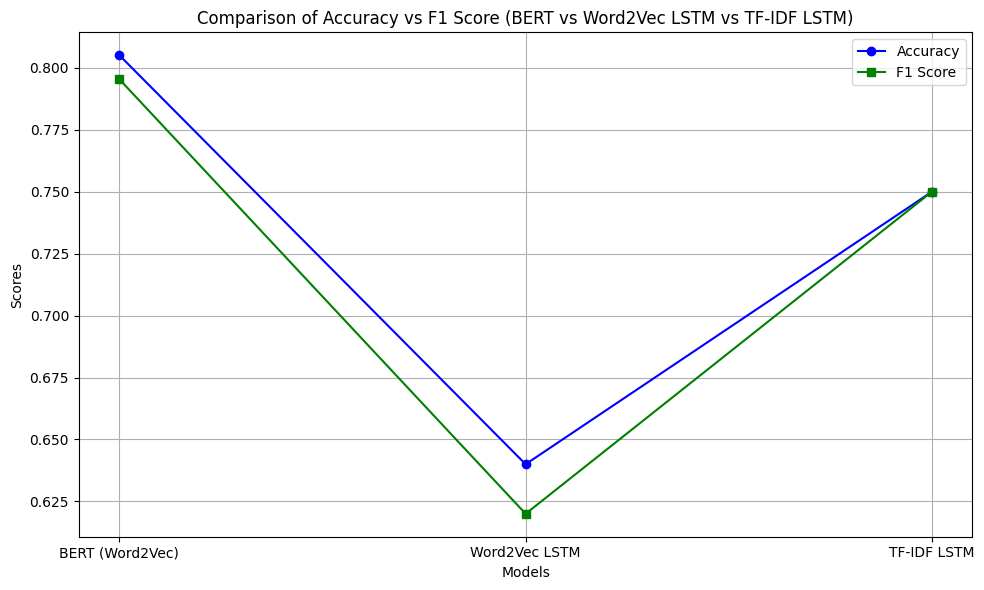

In [ ]:
import matplotlib.pyplot as plt

# Models and their corresponding accuracy and F1 scores
models = ['BERT (Word2Vec)', 'Word2Vec LSTM', 'TF-IDF LSTM']
accuracy_scores = [0.8051, 0.64, 0.75]
f1_scores = [0.7954, 0.62, 0.75]

# Create a figure for comparison
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Accuracy vs F1 score
ax.plot(models, accuracy_scores, marker='o', color='blue', linestyle='-', label='Accuracy')
ax.plot(models, f1_scores, marker='s', color='green', linestyle='-', label='F1 Score')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Accuracy vs F1 Score (BERT vs Word2Vec LSTM vs TF-IDF LSTM)')
ax.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Save the trained model
trainer.save_model("./bert_word2vec_sentiment_model")

# Save the tokenizer
tokenizer.save_pretrained("./bert_word2vec_sentiment_model")


('./bert_word2vec_sentiment_model/tokenizer_config.json',
 './bert_word2vec_sentiment_model/special_tokens_map.json',
 './bert_word2vec_sentiment_model/vocab.txt',
 './bert_word2vec_sentiment_model/added_tokens.json')

In [ ]:
from transformers import BertModel, BertTokenizer
import torch

# Load the trained model and tokenizer (using BertModel for embeddings)
model = BertModel.from_pretrained("./bert_word2vec_sentiment_model")
tokenizer = BertTokenizer.from_pretrained("./bert_word2vec_sentiment_model")

# Function to get the embeddings for a sentence
def get_sentence_embeddings(text):
    # Tokenize and encode the text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)

    # Get model's output (hidden states) from BertModel
    with torch.no_grad():
        outputs = model(**inputs)

    # Extract the embeddings from the last hidden layer
    last_hidden_states = outputs.last_hidden_state  # Shape: (batch_size, sequence_length, hidden_size)

    # We can use the embedding of the [CLS] token (first token) or average over all tokens
    cls_embedding = last_hidden_states[:, 0, :]  # Extract the [CLS] token embedding
    return cls_embedding

# Example usage on my text column
embeddings = []
for text in my_work['Cleaned_Text']:
    embedding = get_sentence_embeddings(text)
    embeddings.append(embedding)

# Convert embeddings list into a tensor for further analysis
embeddings_tensor = torch.cat(embeddings, dim=0)

# i now have a tensor with sentence-level embeddings (i can apply further analysis or clustering on this)
print(f"Shape of embeddings: {embeddings_tensor.shape}")


Shape of embeddings: torch.Size([24970, 768])


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for visualization
pca = PCA(n_components=2)  # Reduce to 2D for visualization
reduced_embeddings = pca.fit_transform(embeddings_tensor.detach().numpy())  # Convert tensor to numpy array

# Plot the reduced embeddings
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
plt.title("PCA of Sentence Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Perform K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(embeddings_tensor.detach().numpy())  # Fit the model on the embeddings

# Get the predicted cluster labels
labels = kmeans.labels_

# Plot the clusters
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='viridis')
plt.title("K-means Clustering of Sentence Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Example query for semantic search
query = "I love this product!"  # Example query sentence
query_embedding = get_sentence_embeddings(query)

# Compute cosine similarity between the query and all sentences in my dataset
query_embedding = query_embedding.detach().numpy()  # Convert to numpy array for similarity computation
similarity_scores = cosine_similarity(query_embedding, embeddings_tensor.detach().numpy())

# Get the most similar sentences
most_similar_idx = similarity_scores.argsort()[0][::-1]  # Sort by similarity
print(f"Most similar sentences to the query: {my_work['Cleaned_Text'].iloc[most_similar_idx[0]]}")


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Find the cosine similarity between the first and second sentence embeddings
similarity = cosine_similarity(embeddings_tensor[0].unsqueeze(0), embeddings_tensor[1].unsqueeze(0))
print(f"Cosine similarity between sentence 1 and sentence 2: {similarity[0][0]}")

# compare all pairs of sentences to find the most similar sentences
similarity_matrix = cosine_similarity(embeddings_tensor.detach().numpy())
print("Cosine Similarity Matrix:\n", similarity_matrix)
